In [ ]:
# Install yfinance library
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
# Import the necessary libraries
import yfinance as yf
import pandas as pd
import datetime

#SONY (First Dataset Chosen)

#Dataset Collection and Preprocessing (Sony)

This dataset was imported from Yahoo Finance which is a reliable source for getting historical data of various firms.



In [ ]:
# Define the ticker symbol and the period
ticker_symbol = 'Sony'
start_date = (datetime.datetime.now() - datetime.timedelta(days=5*365)).strftime('%Y-%m-%d')
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

In [ ]:
import yfinance as yf

# Fetch historical data for Sony (Ticker: SONY)
Sony_data = yf.download(ticker_symbol, start='2023-01-01', end=end_date)

# Print the first few rows of the data
print(Sony_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-01-03  77.150002  77.680000  76.389999  76.650002  76.650002  660600
2023-01-04  77.989998  78.389999  77.489998  77.800003  77.800003  596400
2023-01-05  77.779999  78.110001  77.309998  77.500000  77.500000  541000
2023-01-06  79.230003  81.639999  79.099998  81.389999  81.389999  896700
2023-01-09  81.680000  83.339996  81.629997  82.620003  82.620003  918000


##Preprocessing the Data(Sony)

In [ ]:
Sony_data.shape

(395, 6)

This dataset contains 395 rows and 6 columns.

The actual data source has a start date going back to 2019. In order to have a more recent dataset, I made the start date to be January 1st, 2023.

In [ ]:
Sony_data.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
Sony_data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


We have no missing values!

In [ ]:
Sony_data.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


Let's ensure there is a consistent time interval between data points.





In [ ]:
import pandas as pd

# Fetch historical data for Sony (Ticker: SONY)
Sony_data = yf.download('SONY', start='2023-01-01')

# Ensure the index is in datetime format
Sony_data.index = pd.to_datetime(Sony_data.index)

# Create a complete date range from the start to end of the dataset
full_range = pd.date_range(start=Sony_data.index.min(), end=Sony_data.index.max())

# Identify missing dates
missing_dates = full_range.difference(Sony_data.index)

# Print missing dates
print(f"Missing dates: {missing_dates}")


[*********************100%%**********************]  1 of 1 completed

Missing dates: DatetimeIndex(['2023-01-07', '2023-01-08', '2023-01-14', '2023-01-15',
               '2023-01-16', '2023-01-21', '2023-01-22', '2023-01-28',
               '2023-01-29', '2023-02-04',
               ...
               '2024-06-30', '2024-07-04', '2024-07-06', '2024-07-07',
               '2024-07-13', '2024-07-14', '2024-07-20', '2024-07-21',
               '2024-07-27', '2024-07-28'],
              dtype='datetime64[ns]', length=180, freq=None)


As we can see, we have a couple days missing. Let's now handle those missing dates!

In [ ]:
# Reindex the DataFrame to include all dates in the full range
Sony_data = Sony_data.reindex(full_range)

# Fill missing values (forward fill)
Sony_data.fillna(method='ffill', inplace=True)

# Print the first few rows of the data
print(Sony_data.head())


                 Open       High        Low      Close  Adj Close    Volume
2023-01-03  77.150002  77.680000  76.389999  76.650002  76.650002  660600.0
2023-01-04  77.989998  78.389999  77.489998  77.800003  77.800003  596400.0
2023-01-05  77.779999  78.110001  77.309998  77.500000  77.500000  541000.0
2023-01-06  79.230003  81.639999  79.099998  81.389999  81.389999  896700.0
2023-01-07  79.230003  81.639999  79.099998  81.389999  81.389999  896700.0


<ipython-input-144-9f0e73e69e9b>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Sony_data.fillna(method='ffill', inplace=True)


The missing dates have been filled and we now have a daily time interval between our data points.

##Visualizations to explore and understand the dataset(Sony)

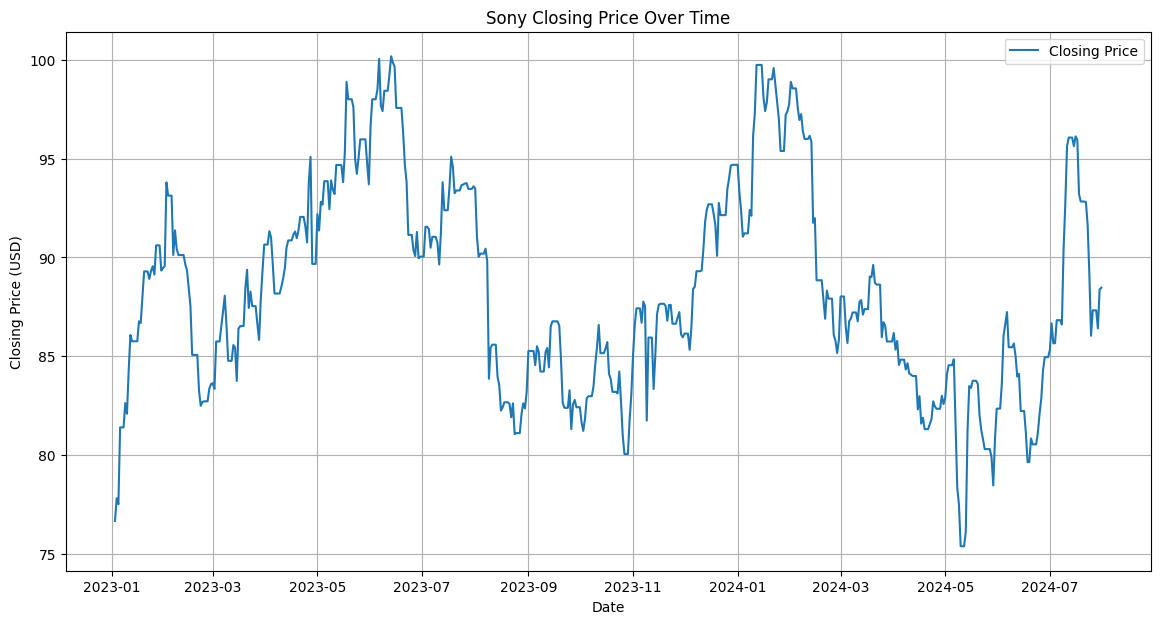

In [ ]:
import matplotlib.pyplot as plt

# Plot the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(Sony_data.index, Sony_data['Close'], label='Closing Price')
plt.title('Sony Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Sony_data['Close'].mean()

88.31167554855347

Observing our plot above, we can note these few insights:

-Trend: Our plot shows us that our stock gains and looses value every now and then as we have upwards and downwars trends alternating approximately after every 2 months.

-Seasonality: We can see that on average, every 2 months, our closing prices go down.

-Volatility: We also can note large volatility showing considerable swings in prices.

-Outliers: We note a few outliers (Very low prices and Very high prices) that can also be due to market conditions. I want to note specifically the high spike between January 2023 and March 2023. This is most probably due to new contracts, new goals, new objectives set by Sony, hence higher closing prices.



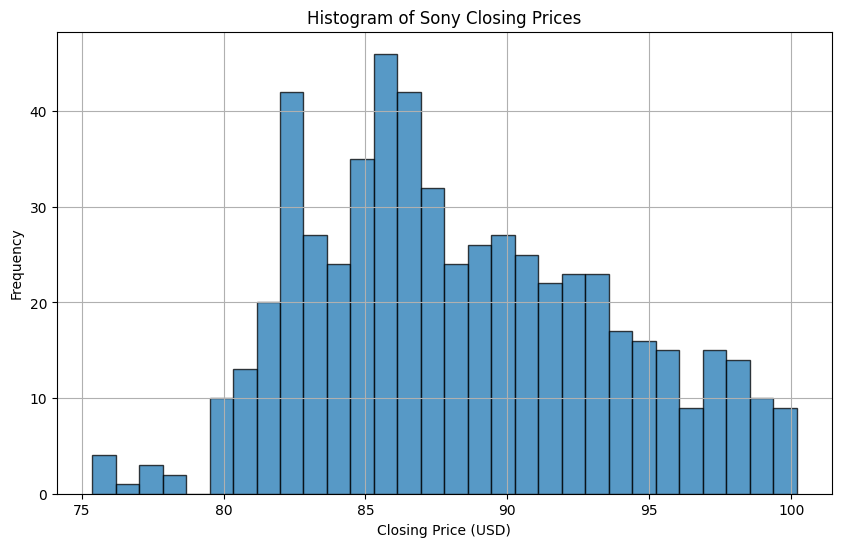

In [ ]:
# Plot a histogram of the closing prices
plt.figure(figsize=(10, 6))
plt.hist(Sony_data['Close'], bins=30, alpha=0.75, edgecolor='black')
plt.title('Histogram of Sony Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Our histogram tells us that there is some central tendency, but there is also a presence of some outliers.

I primarily used the Closing Stock because it usually tells us the final price at which stock was traded for that day.

Closing prices are mainly going to be worked on throughout the document.

However, let's now look at the daily price range between opening and closing prices to see the daily movements and volatility.

In [ ]:
from re import S
Sony_data['Price_Range'] = Sony_data['Open'] - Sony_data['Close']
Sony_data.head()

,Open,High,Low,Close,Adj Close,Volume,Price_Range
2023-01-03,77.150002,77.680000,76.389999,76.650002,76.650002,660600.0,0.500000
2023-01-04,77.989998,78.389999,77.489998,77.800003,77.800003,596400.0,0.189995
2023-01-05,77.779999,78.110001,77.309998,77.500000,77.500000,541000.0,0.279999
2023-01-06,79.230003,81.639999,79.099998,81.389999,81.389999,896700.0,-2.159996
2023-01-07,79.230003,81.639999,79.099998,81.389999,81.389999,896700.0,-2.159996


In [ ]:
Sony_data['Price_Range'].mean()

-0.0029426548216078016

We note a mean of -0.003 which is very low in terms of price range. This tells us that there's very little difference in average between opening and closing prices.

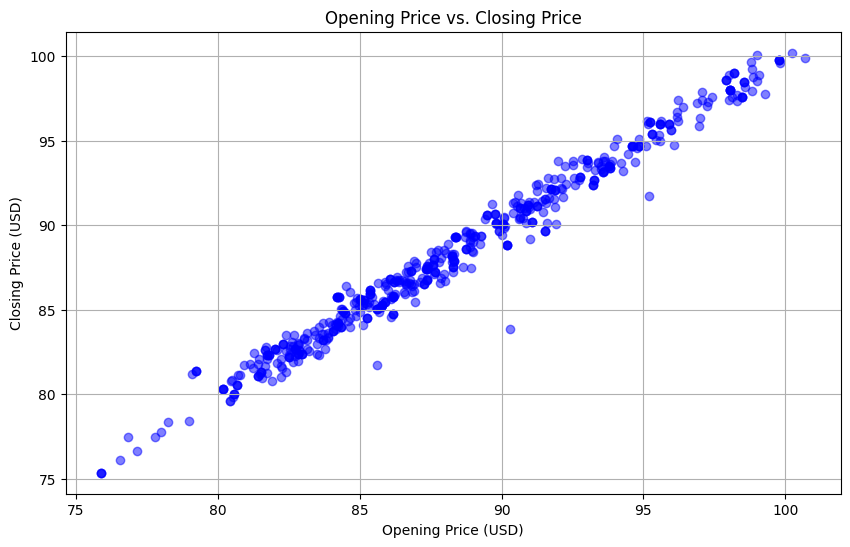

0.9900107531839915

In [ ]:
import matplotlib.pyplot as plt

# Scatter Plot: Opening vs. Closing Prices
plt.figure(figsize=(10, 6))
plt.scatter(Sony_data['Open'], Sony_data['Close'], alpha=0.5, c='blue')
plt.title('Opening Price vs. Closing Price')
plt.xlabel('Opening Price (USD)')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()
Sony_data['Open'].corr(Sony_data['Close'])


Moreover, the higher the opening price, the more likely it is for the closing price to be high.

We note a very strong correlation of 0.99.

#Model Building- ARIMA Model(Sony)


Let's first split the data.

In [ ]:
Sony_data = yf.download(ticker_symbol, start='2023-01-01', end=end_date)

# Print the first few rows of the data
print(Sony_data.shape)


[*********************100%%**********************]  1 of 1 completed

(395, 6)


70% train and 30% test.




In [ ]:
#Train-test split
train_size=int(len(Sony_data)*0.7)
train=Sony_data[:train_size]
test=Sony_data[train_size:]

Now, let's make sure our data is stationary first.

In [ ]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
import numpy as np
adf_result = adfuller(Sony_data['Close'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

from statsmodels.tsa.stattools import adfuller
import numpy as np
adf_result = adfuller(Sony_data['Open'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# If not stationary, apply differencing
d = 0
while adf_result[1] > 0.05:
    d += 1
    differenced_data_Sony = np.diff(Sony_data['Close'], n=d)
    adf_result = adfuller(differenced_data_Sony)

d = 0
while adf_result[1] > 0.05:
    d += 1
    differenced_data_Sony = np.diff(Sony_data['Open'], n=d)
    adf_result = adfuller(differenced_data_Sony)



ADF Statistic: -3.133307451616236
p-value: 0.024184483638200433
ADF Statistic: -3.3205511412121704
p-value: 0.013984460719611803


The ADF Statistic for Closing Price of our differentiated data is -3.13 and its p-value is 0.03.

The ADF Statistic for Opening Price of our differentiated data is -3.32 and its p-value is 0.01.

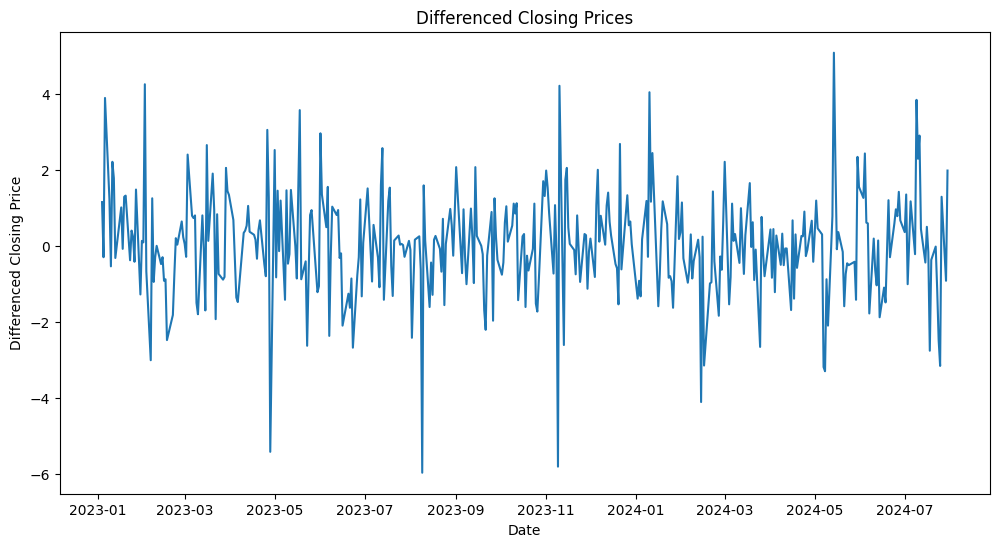

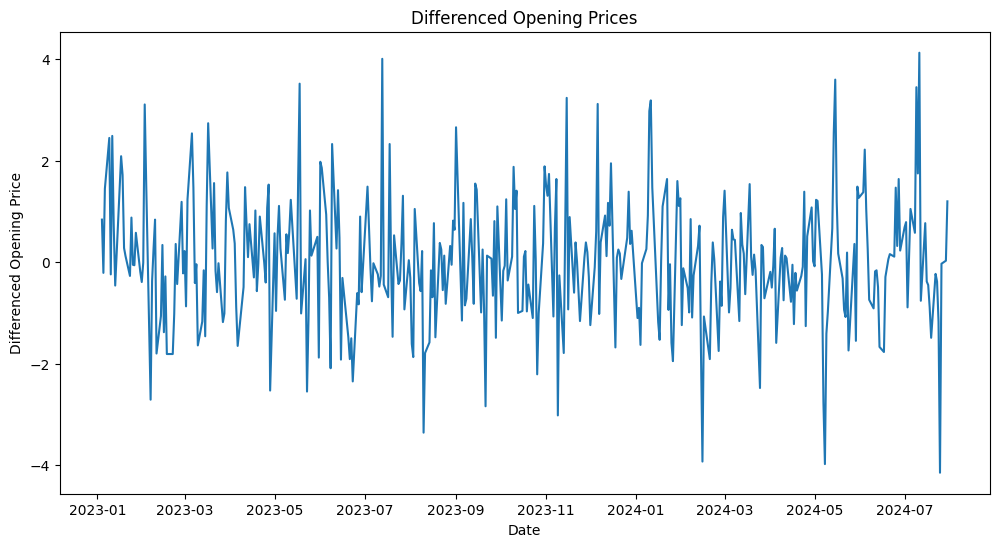

In [ ]:
import matplotlib.pyplot as plt

# Differencing the data to achieve stationarity
differenced_closing_Sony = Sony_data['Close'].diff().dropna()
differenced_opening_Sony = Sony_data['Open'].diff().dropna()

# Plot differenced closing prices
plt.figure(figsize=(12, 6))
plt.plot(differenced_closing_Sony)
plt.title('Differenced Closing Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Closing Price')
plt.show()

# Plot differenced opening prices
plt.figure(figsize=(12, 6))
plt.plot(differenced_opening_Sony)
plt.title('Differenced Opening Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Opening Price')
plt.show()


With our differenced data, we can see that our Closing prices and Opening Prices are stationary.

Since we achieved stationarity, our d is 1, we achieved differentiating once.
Now, let's find our p and q for our ARIMA model.

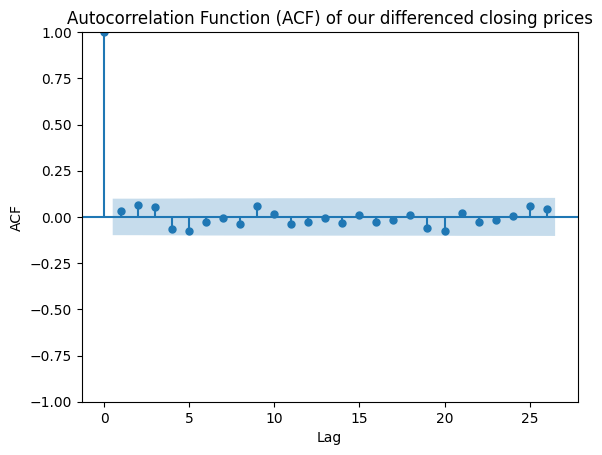

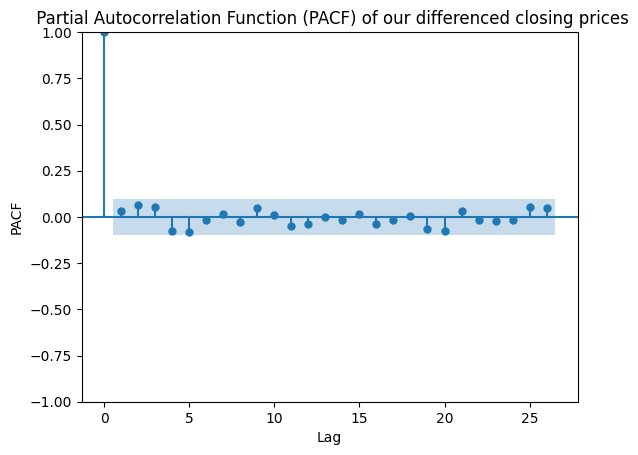

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(differenced_closing_Sony)
plt.title('Autocorrelation Function (ACF) of our differenced closing prices')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plot_pacf(differenced_closing_Sony)
plt.title(' Partial Autocorrelation Function (PACF) of our differenced closing prices')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()



Let's build our ARIMA Model for our Closing Prices where our attempt order is as follows:

(2,1,2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

276    97.523659
277    97.449539
278    97.249966
279    97.487040
280    97.489520
         ...    
390    97.464290
391    97.334243
392    97.403274
393    97.475051
394    97.347931
Name: predicted_mean, Length: 119, dtype: float64
Root Mean Squared Error (RMSE): 12.448545044439056


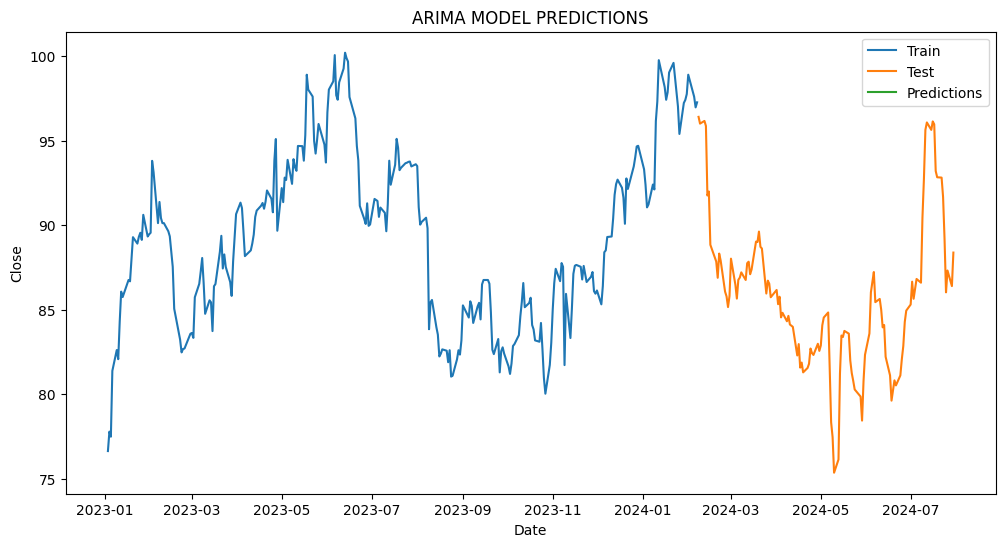

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Splitting the data into train and test sets
train_size = int(len(Sony_data) * 0.7)
train, test = Sony_data[:train_size], Sony_data[train_size:]

# Defining the ARIMA model
order = (2, 1, 2)
model = ARIMA(train['Close'], order=order)
model_fit = model.fit()

# Making predictions
predictions_Sony = model_fit.forecast(steps=len(test))

# Checking the predictions
print(predictions_Sony)

# Calculating the RMSE
rmse = sqrt(mean_squared_error(test['Close'], predictions_Sony))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Converting predictions to a pandas Series to use the test index
predictions_series = pd.Series(predictions_Sony, index=test.index)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting train data
sns.lineplot(x=train.index, y=train['Close'], label='Train')

# Plotting test data
sns.lineplot(x=test.index, y=test['Close'], label='Test')

# Plotting predictions
sns.lineplot(x=predictions_series.index, y=predictions_series, label='Predictions')

plt.title('ARIMA MODEL PREDICTIONS')
plt.show()



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(test['Close'], predictions_Sony)
mse = mean_squared_error(test['Close'], predictions_Sony)
rmse = sqrt(mse)
r2 = r2_score(test['Close'], predictions_Sony)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 11.622464599972727
Mean Squared Error (MSE): 154.9662737234282
Root Mean Squared Error (RMSE): 12.448545044439056
R-squared (R²): -6.789719318190159


##Model Evaluation of first model(Sony)

Interpretation:

MAE: Our mean absolute error of 11.62 tells us that the absolute difference between our predicted and actual values in our dataset is around 12. On average, our predicted closing prices are off by 12 dollars.

MSE: Our mean squared error of 154.96 tells us that on average, the squared difference between our predicted closing prices and actual prices are around 154 dollars which is very large as squaring amplifies the effect of larger errors.

RMSE: The RMSE of this model is respectively the square root of the MSE. It is 12.44. The same interpretation of the MSE value can be translated to the RMSE.

R2: Our R2 of -6.78 tells us how poorly this model is running. The predictions are significantly off from the actual values.



#Model Improvement(Sony)


Let's try to improve our model using AIC (Akaike information Criterion).


In [ ]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

In [ ]:
train_size = int(len(Sony_data) * 0.7)
train, test = Sony_data[:train_size], Sony_data[train_size:]

In [ ]:
p = range(0, 10)
d = range(0, 1)
q = range(0, 10)

In [ ]:
# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

In [ ]:
# Initialize variables to store the best parameters and their corresponding AIC
best_aic = float("inf")
best_pdq = None

In [ ]:
# Iterate over all combinations of p, d, q
for param in pdq:
    try:
        # Fit the ARIMA model
        model = ARIMA(train['Close'], order=param)
        model_fit = model.fit()

        # Print current model parameters and AIC
        print(f'ARIMA{param} - AIC:{model_fit.aic}')

        # Check if the current AIC is the best we have seen so far
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
    except Exception as e:
        continue

print(f'Best ARIMA{best_pdq} - AIC:{best_aic}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) - AIC:1696.069222772885
ARIMA(0, 0, 1) - AIC:1415.3554503209502
ARIMA(0, 0, 2) - AIC:1270.8798553240522


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 3) - AIC:1173.0107569836323


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 4) - AIC:1116.5934364961342


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 5) - AIC:1089.8543052001758


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 6) - AIC:1058.905498850828


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 7) - AIC:1029.5219704473247


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 8) - AIC:1026.888627243589


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 9) - AIC:1026.126623282956
ARIMA(1, 0, 0) - AIC:971.5092671495414


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1) - AIC:973.1413063655098


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2) - AIC:974.9758833546701


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 3) - AIC:974.6943593920769


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 4) - AIC:976.0666061639527


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 5) - AIC:978.0307132499213


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 6) - AIC:979.9964714275652


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 7) - AIC:981.6301816923647


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 8) - AIC:983.5710311179098


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 9) - AIC:980.4946256162261


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0) - AIC:973.127000475781


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1) - AIC:975.1173558999375


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2) - AIC:976.609087334971


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 3) - AIC:976.309077902662


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 4) - AIC:978.0404010708837


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARIMA(2, 0, 5) - AIC:980.0265975044874
ARIMA(2, 0, 6) - AIC:982.0165287002894


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 7) - AIC:983.6233791038607


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 8) - AIC:984.0793385711461


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2, 0, 9) - AIC:980.9266906672406


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 0) - AIC:975.0677662967732


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 1) - AIC:976.4854481590269


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARIMA(3, 0, 2) - AIC:971.837265015319


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 3) - AIC:973.992748417059


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 4) - AIC:976.4497239380389
ARIMA(3, 0, 5) - AIC:982.034893100511


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARIMA(3, 0, 6) - AIC:976.3501352119997


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 7) - AIC:978.0004708183737


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 8) - AIC:977.900655634668


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(3, 0, 9) - AIC:979.4631783906239
ARIMA(4, 0, 0) - AIC:974.5918200125811


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 0, 1) - AIC:976.3084287808597


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARIMA(4, 0, 2) - AIC:974.0829686210825


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(4, 0, 3) - AIC:974.5624273678849


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 0, 4) - AIC:976.1214495944738


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 0, 5) - AIC:980.0024973425183


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 0, 6) - AIC:982.6059344905673


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 0, 7) - AIC:980.2280349513824


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 0, 8) - AIC:979.4260350817149


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(4, 0, 9) - AIC:980.6438577926658
ARIMA(5, 0, 0) - AIC:976.0465917398524


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(5, 0, 1) - AIC:977.8712539017581


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARIMA(5, 0, 2) - AIC:975.9697889940087


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(5, 0, 3) - AIC:974.7096314950375


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(5, 0, 4) - AIC:974.6509541788027


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(5, 0, 5) - AIC:975.901339174895


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(5, 0, 6) - AIC:976.3282271891057


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(5, 0, 7) - AIC:978.3213837396568


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(5, 0, 8) - AIC:979.88594560436


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(5, 0, 9) - AIC:982.3044059806236
ARIMA(6, 0, 0) - AIC:977.6652440706112


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(6, 0, 1) - AIC:979.5994985266854


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARIMA(6, 0, 2) - AIC:979.119967119048


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(6, 0, 3) - AIC:978.8521326238572


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(6, 0, 4) - AIC:978.7729498029239


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(6, 0, 5) - AIC:975.3375308226143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(6, 0, 6) - AIC:980.6337642745325


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(6, 0, 7) - AIC:983.3353520770715


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(6, 0, 8) - AIC:985.3873974619305


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(6, 0, 9) - AIC:982.6367338581806
ARIMA(7, 0, 0) - AIC:979.5535324514466


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(7, 0, 1) - AIC:981.5535322126266


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARIMA(7, 0, 2) - AIC:980.1044021352513


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(7, 0, 3) - AIC:979.7220551955636


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(7, 0, 4) - AIC:985.1369114836145


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(7, 0, 5) - AIC:977.892736979571


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(7, 0, 6) - AIC:980.7923476617359


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(7, 0, 7) - AIC:980.8485063133635


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(7, 0, 8) - AIC:984.766894120164


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(7, 0, 9) - AIC:985.9529975304021
ARIMA(8, 0, 0) - AIC:981.5535242315959


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(8, 0, 1) - AIC:983.2148011194562


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARIMA(8, 0, 2) - AIC:982.6202541689253


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(8, 0, 3) - AIC:979.8572015076472


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(8, 0, 4) - AIC:987.6246304315507


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(8, 0, 5) - AIC:978.4095247960793


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(8, 0, 6) - AIC:980.9317138745378


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(8, 0, 7) - AIC:984.446574804994


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(8, 0, 8) - AIC:986.1819898778708


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(8, 0, 9) - AIC:988.2057190173273
ARIMA(9, 0, 0) - AIC:983.5074662897002


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(9, 0, 1) - AIC:984.8512079917357


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

ARIMA(9, 0, 2) - AIC:983.5251248902626


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(9, 0, 3) - AIC:985.294484749712


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(9, 0, 4) - AIC:987.2592186423258


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(9, 0, 5) - AIC:981.9416798838677


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(9, 0, 6) - AIC:984.8569534078288


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(9, 0, 7) - AIC:986.8258633074952


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/di

ARIMA(9, 0, 8) - AIC:988.0932744397369
ARIMA(9, 0, 9) - AIC:989.7452429402542
Best ARIMA(1, 0, 0) - AIC:971.5092671495414


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


We can see that our best ARIMA's order is as follows (1,0,0).






/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

276    97.037865
277    96.821584
278    96.611005
279    96.405978
280    96.206355
         ...    
390    89.224162
391    89.213876
392    89.203860
393    89.194109
394    89.184614
Name: predicted_mean, Length: 119, dtype: float64
Root Mean Squared Error (RMSE): 6.995747189099924


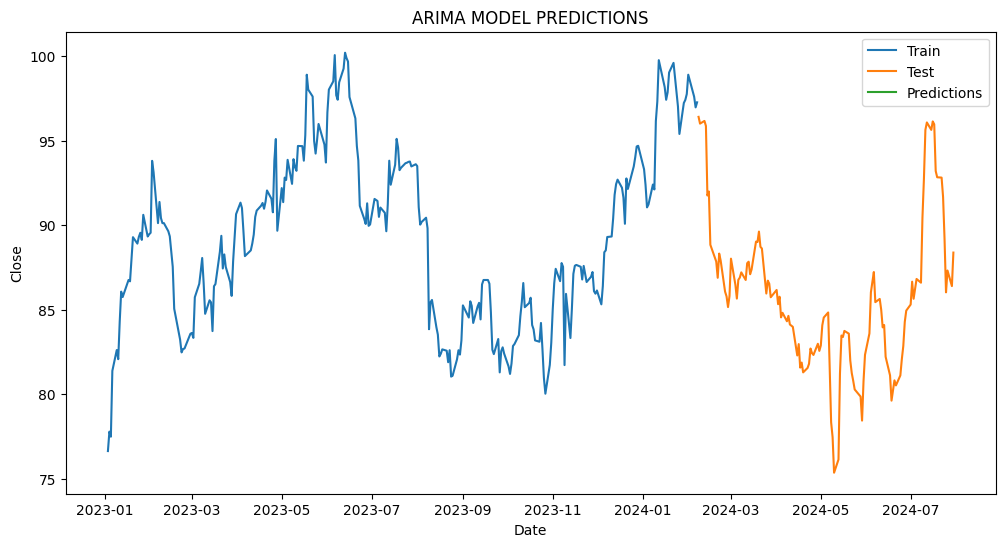

In [ ]:
order = (1, 0, 0)  #  Best ARIMA model based of our findings.
model = ARIMA(train['Close'], order=order)
model_fit = model.fit()

# Making predictions
predictions_Sony2 = model_fit.forecast(steps=len(test))

# Checking the predictions
print(predictions_Sony2)

# Calculating the RMSE
rmse = sqrt(mean_squared_error(test['Close'], predictions_Sony2))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Converting predictions to a pandas Series to use the test index
predictions_series = pd.Series(predictions_Sony2, index=test.index)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting train data
sns.lineplot(x=train.index, y=train['Close'], label='Train')

# Plotting test data
sns.lineplot(x=test.index, y=test['Close'], label='Test')

# Plotting predictions
sns.lineplot(x=predictions_series.index, y=predictions_series, label='Predictions')

plt.title('ARIMA MODEL PREDICTIONS')
plt.show()



This stock data is so volatile that it is hard to make accurate predictions for our model.

Let's evaluate our second model!



#Second Model Evaluation-Evaluation(Sony)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(test['Close'], predictions_Sony2)
mse = mean_squared_error(test['Close'], predictions_Sony2)
rmse = sqrt(mse)
r2 = r2_score(test['Close'], predictions_Sony2)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 6.412354303577912
Mean Squared Error (MSE): 48.94047873379948
Root Mean Squared Error (RMSE): 6.995747189099924
R-squared (R²): -1.4601004042631036


In [ ]:
test['Close'].isna().sum()
test['Close'].isnull().sum()

0

Interpretation:

By using AIC, we were able to choose our best order and improve our model.

Our MAE decreased from 11.62 to 6.41, our MSE decreased from 154.96 to 48.94, our RMSE decreased from 12.44 to 6.99, and our R2 from -6.78 to -1.5.

Although these values are far from describing a good model, we can note improvements in our model after implementing our best order.





##Strenghts and Weaknesses of our model performance(Sony)

Strenghts: Improvement in MAE, MSE AND RMSE. This shows that our model is making more accurate predictions than the first model and is picking up some certain market trends as a result of error improvement.

The values we also got from our model evaluation shows us that our market is very volatile (unusual datapoints) which can be a strenght for SONY if they consider engaging in high risk.

Weaknesses: Our negative R2 shows us that our model most of the time fails to capture cruicial patterns. Although we made our data stationary, it is very important to consider the voltility of our dataset. Hence, a reduction in our predictions' accuracy.


#Amazon (Second Dataset Chosen)

#Dataset Collection and Preprocessing(Amazon)

This dataset was imported from Yahoo Finance which is a reliable source for getting historical data of various firms.

In [ ]:
# Define the ticker symbol and the period
ticker_symbol = 'AMZN'
start_date = (datetime.datetime.now() - datetime.timedelta(days=5*365)).strftime('%Y-%m-%d')
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

In [ ]:
import yfinance as yf

# Fetch historical data for Amazon (Ticker: AMZN)
AMZN_data = yf.download(ticker_symbol, start='2024-01-01', end=end_date)

# Print the first few rows of the data
print(AMZN_data.head())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  151.539993  152.380005  148.389999  149.929993  149.929993   
2024-01-03  149.199997  151.050003  148.330002  148.470001  148.470001   
2024-01-04  145.589996  147.380005  144.050003  144.570007  144.570007   
2024-01-05  144.690002  146.589996  144.529999  145.240005  145.240005   
2024-01-08  146.740005  149.399994  146.149994  149.100006  149.100006   

              Volume  
Date                  
2024-01-02  47339400  
2024-01-03  49425500  
2024-01-04  56039800  
2024-01-05  45124800  
2024-01-08  46757100  


##Preprocessing the Data(Amazon)

In [ ]:
AMZN_data.shape

(145, 6)

We have 145 rows and 6 columns.

In order to have a more recent dataset, I made the start date to be January 1st, 2024.

We have 145 days of data.

In [ ]:
AMZN_data.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
AMZN_data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


We have no missing values!


In [ ]:
AMZN_data.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


Let's make sure we have a consistent time interval between our datapoints.

In [ ]:
import pandas as pd

# Fetch historical data for AMAZON (Ticker: AMZN)
AMZN_data = yf.download('AMZN', start='2024-01-01')

# Ensure the index is in datetime format
AMZN_data.index = pd.to_datetime(AMZN_data.index)

# Create a complete date range from the start to end of the dataset
full_range = pd.date_range(start=AMZN_data.index.min(), end=AMZN_data.index.max())

# Identify missing dates
missing_dates = full_range.difference(AMZN_data.index)

# Print missing dates
print(f"Missing dates: {missing_dates}")


[*********************100%%**********************]  1 of 1 completed

Missing dates: DatetimeIndex(['2024-01-06', '2024-01-07', '2024-01-13', '2024-01-14',
               '2024-01-15', '2024-01-20', '2024-01-21', '2024-01-27',
               '2024-01-28', '2024-02-03', '2024-02-04', '2024-02-10',
               '2024-02-11', '2024-02-17', '2024-02-18', '2024-02-19',
               '2024-02-24', '2024-02-25', '2024-03-02', '2024-03-03',
               '2024-03-09', '2024-03-10', '2024-03-16', '2024-03-17',
               '2024-03-23', '2024-03-24', '2024-03-29', '2024-03-30',
               '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
               '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
               '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
               '2024-05-12', '2024-05-18', '2024-05-19', '2024-05-25',
               '2024-05-26', '2024-05-27', '2024-06-01', '2024-06-02',
               '2024-06-08', '2024-06-09', '2024-06-15', '2024-06-16',
               '2024-06-19', '2024-06-22', '2024-06-23', '2024

We have a number of days missing. Let's now handle them.

Let's first have a look at our dataset (daily).

In [ ]:
AMZN_data.asfreq(freq='D')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,151.539993,152.380005,148.389999,149.929993,149.929993,47339400.0
2024-01-03,149.199997,151.050003,148.330002,148.470001,148.470001,49425500.0
2024-01-04,145.589996,147.380005,144.050003,144.570007,144.570007,56039800.0
2024-01-05,144.690002,146.589996,144.529999,145.240005,145.240005,45124800.0
2024-01-06,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-07-27,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-28,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100.0


To avoid the missing values, let's put a business calendar day frequency to narrow the focus down to working days.

In [ ]:
AMZN_data.asfreq(freq='B')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,151.539993,152.380005,148.389999,149.929993,149.929993,47339400.0
2024-01-03,149.199997,151.050003,148.330002,148.470001,148.470001,49425500.0
2024-01-04,145.589996,147.380005,144.050003,144.570007,144.570007,56039800.0
2024-01-05,144.690002,146.589996,144.529999,145.240005,145.240005,45124800.0
2024-01-08,146.740005,149.399994,146.149994,149.100006,149.100006,46757100.0
...,...,...,...,...,...,...
2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200.0
2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000.0
2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100.0


In [ ]:
# Reindex the DataFrame to include all dates in the full range
AMZN_data = AMZN_data.reindex(full_range)

# Fill missing values (forward fill)
AMZN_data.fillna(method='ffill', inplace=True)

# Print the first few rows of the data
print(AMZN_data.head())

                  Open        High         Low       Close   Adj Close  \
2024-01-02  151.539993  152.380005  148.389999  149.929993  149.929993   
2024-01-03  149.199997  151.050003  148.330002  148.470001  148.470001   
2024-01-04  145.589996  147.380005  144.050003  144.570007  144.570007   
2024-01-05  144.690002  146.589996  144.529999  145.240005  145.240005   
2024-01-06  144.690002  146.589996  144.529999  145.240005  145.240005   

                Volume  
2024-01-02  47339400.0  
2024-01-03  49425500.0  
2024-01-04  56039800.0  
2024-01-05  45124800.0  
2024-01-06  45124800.0  


<ipython-input-177-32252b1d9a33>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  AMZN_data.fillna(method='ffill', inplace=True)


Our missing days have now been handled.

##Visualizations to explore and understand the dataset(Amazon)

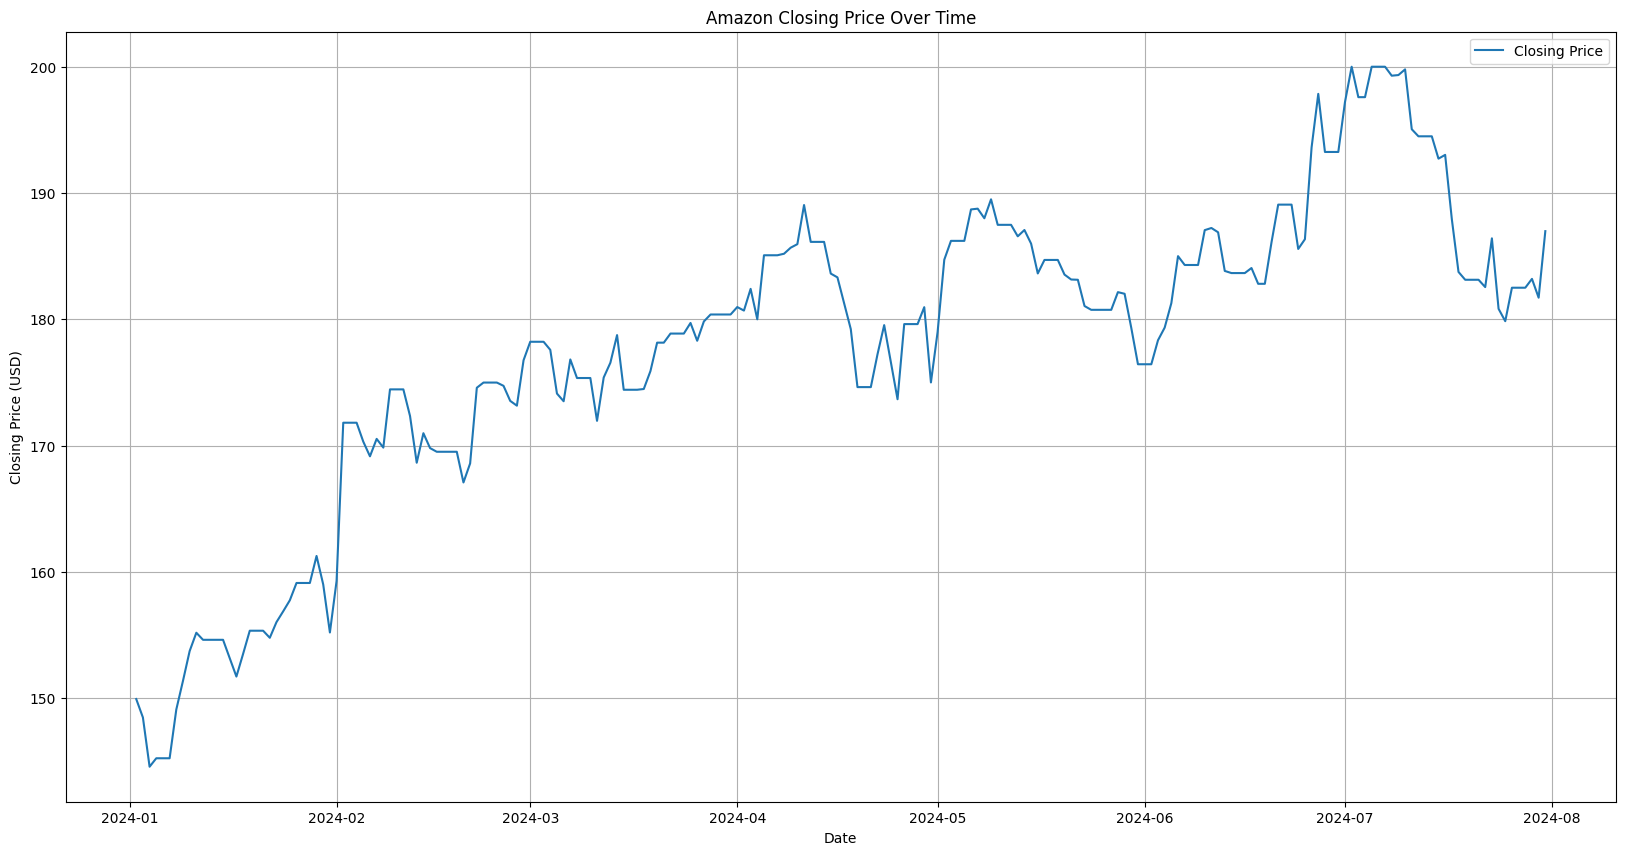

In [ ]:
import matplotlib.pyplot as plt

# Plot the closing price over time
plt.figure(figsize=(20, 10))
plt.plot(AMZN_data.index, AMZN_data['Close'], label='Closing Price')
plt.title('Amazon Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Observing this plot of our Amazon dataset, we can notice that our closing prices follow an upward trend and grows overtime (on a monthly basis).

-Trend: Our plot shows us that our stock mostly gains value as we note upward trends showing a consistent growth.

-Seasonality: We can also see that in June/July, closing prices are going up. This is likely due to the season of summer opening.

-Volatility: We also can note a not so large volatility showing consistency in prices going up despite its drops at some periods of time.

-Cyclical variation: We can see a few similar patterns of spikes and lows every month as our closing prices increase.

In [ ]:
AMZN_data.mean()

,0
Open,1.777974e+02
High,1.795386e+02
Low,1.759916e+02
Close,1.778125e+02
Adj Close,1.778125e+02
Volume,4.343076e+07


Our prices are very constant observing the means of our different price categories.

An opening price average of 1.77 and a closing price average of 1.77 show consistent patterns in stock value.

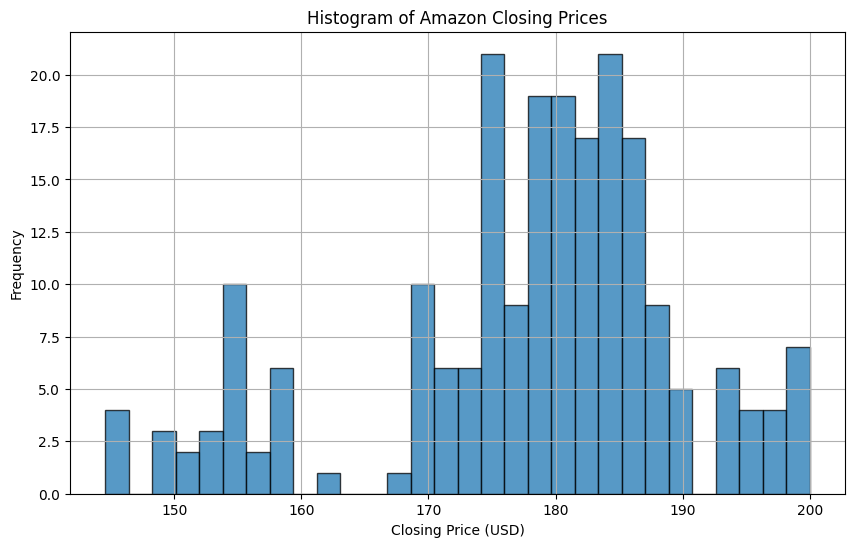

In [ ]:
# Plot a histogram of the closing prices
plt.figure(figsize=(10, 6))
plt.hist(AMZN_data['Close'], bins=30, alpha=0.75, edgecolor='black')
plt.title('Histogram of Amazon Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Our histogram for our closing prices tells us that there are a wide range of high closing prices (170-190). However, we must note the few presence of low closing prices(<160) and very high closing prices (>190).

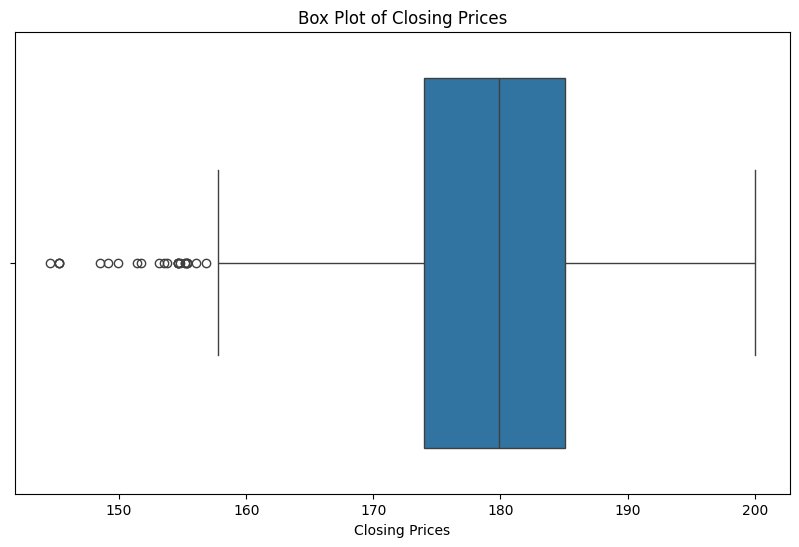

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=AMZN_data['Close'])
plt.title('Box Plot of Closing Prices')
plt.xlabel('Closing Prices')
plt.show()

We can note the presence of a few lower end outliers in our dataset (very low closing prices).

We saw earlier that our average closing and opening prices were really close to each other which shows consistency in prices. Let's evaluate it by calculating the range average.

In [ ]:
from re import S
AMZN_data['Price_Range'] = AMZN_data['Open'] - AMZN_data['Close']
AMZN_data.head()

,Open,High,Low,Close,Adj Close,Volume,Price_Range
2024-01-02,151.539993,152.380005,148.389999,149.929993,149.929993,47339400.0,1.610001
2024-01-03,149.199997,151.050003,148.330002,148.470001,148.470001,49425500.0,0.729996
2024-01-04,145.589996,147.380005,144.050003,144.570007,144.570007,56039800.0,1.019989
2024-01-05,144.690002,146.589996,144.529999,145.240005,145.240005,45124800.0,-0.550003
2024-01-06,144.690002,146.589996,144.529999,145.240005,145.240005,45124800.0,-0.550003


In [ ]:
AMZN_data['Price_Range'].mean()

-0.015047181327387972

This confirms the point we made earlier and shows the little difference between opening and closing prices.

In average, however, closing prices are higher. This explains the negative sign.

Now, let's closely look at their relationship through a scatterplot.

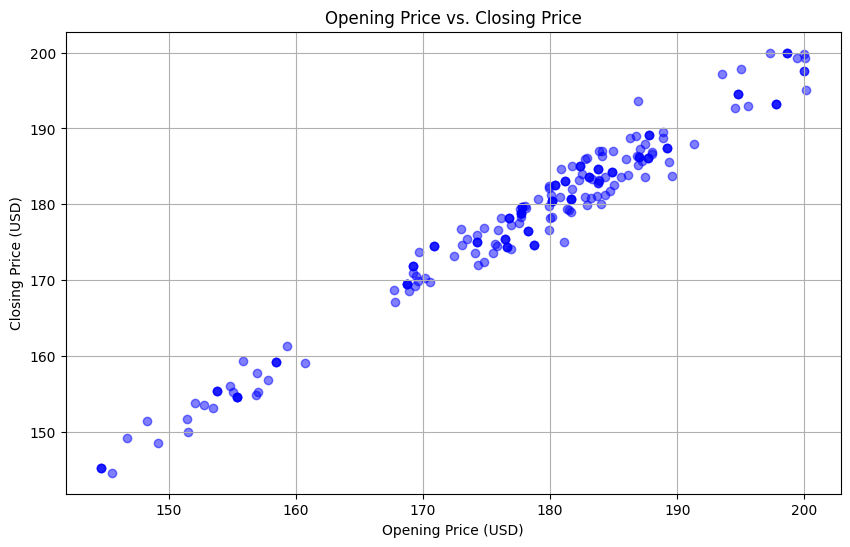

0.9860277571158373

In [ ]:
import matplotlib.pyplot as plt

# Scatter Plot: Opening vs. Closing Prices
plt.figure(figsize=(10, 6))
plt.scatter(AMZN_data['Open'], AMZN_data['Close'], alpha=0.5, c='blue')
plt.title('Opening Price vs. Closing Price')
plt.xlabel('Opening Price (USD)')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()
AMZN_data['Open'].corr(AMZN_data['Close'])


We can now deduce that the higher the opening price, the higher the closing price. This is justified by a high correlation of 0.99.

#Model Building- ARIMA Model(Amazon)

Let's first split our data.

In [ ]:
AMZN_data.shape

(212, 7)

80% train and 20% test.



In [ ]:
#Train-test split
train_size=int(len(AMZN_data)*0.8)
train=AMZN_data[:train_size]
test=AMZN_data[train_size:]

Let's make our data stationary!

In [ ]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
import numpy as np
adf_result = adfuller(AMZN_data['Close'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')



# If not stationary, apply differencing
d = 0
while adf_result[1] > 0.05:
    d += 1
    differenced_data_AMZN = np.diff(AMZN_data['Close'], n=d)
    adf_result = adfuller(differenced_data_AMZN)




ADF Statistic: -2.691622276503964
p-value: 0.07549923466133986


Our p-value is a little bit above our threshold of 0.05 for rejecting the null hypothesis of non-stationarity.

Let's further differentiate our data.

In [ ]:
d = 1
second_differenced_data_AMZN = np.diff(differenced_data_AMZN, n=1)
adf_result_second = adfuller(second_differenced_data_AMZN)

# While loop for second differencing
while adf_result_second[1] > 0.05:
    d += 1
    second_differenced_data_AMZN = np.diff(differenced_data_AMZN, n=d)
    adf_result_second = adfuller(second_differenced_data_AMZN)
    print(f"Second differencing (d={d}): ADF Statistic={adf_result_second[0]}, p-value={adf_result_second[1]}")

print(f"Final ADF Statistic after second differencing: {adf_result_second[0]}")
print(f"Final p-value after second differencing: {adf_result_second[1]}")

Final ADF Statistic after second differencing: -9.86012169048316
Final p-value after second differencing: 4.255100363796706e-17


After differentiating our data further, we see that our p-value worsened.
Let's apply a log transformation to see if it imporoves before differentiating our data.

In [ ]:
data_log_AMZN = np.log(AMZN_data['Close'])

# Initial settings
d = 0
threshold = 0.05

# Apply differencing to the log-transformed data
differenced_data_log_AMZN = np.diff(data_log_AMZN, n=d)
adf_result = adfuller(differenced_data_log_AMZN)

# While loop for differencing
while adf_result[1] > threshold:
    d += 1
    differenced_data_log_AMZN = np.diff(data_log_AMZN, n=d)
    adf_result = adfuller(differenced_data_log_AMZN)
    print(f"Differencing (d={d}): ADF Statistic={adf_result[0]}, p-value={adf_result[1]}")
print(f"Final ADF Statistic after differencing: {adf_result[0]}")
print(f"Final p-value after differencing: {adf_result[1]}")

Final ADF Statistic after differencing: -2.9006551024301324
Final p-value after differencing: 0.04527187099081687


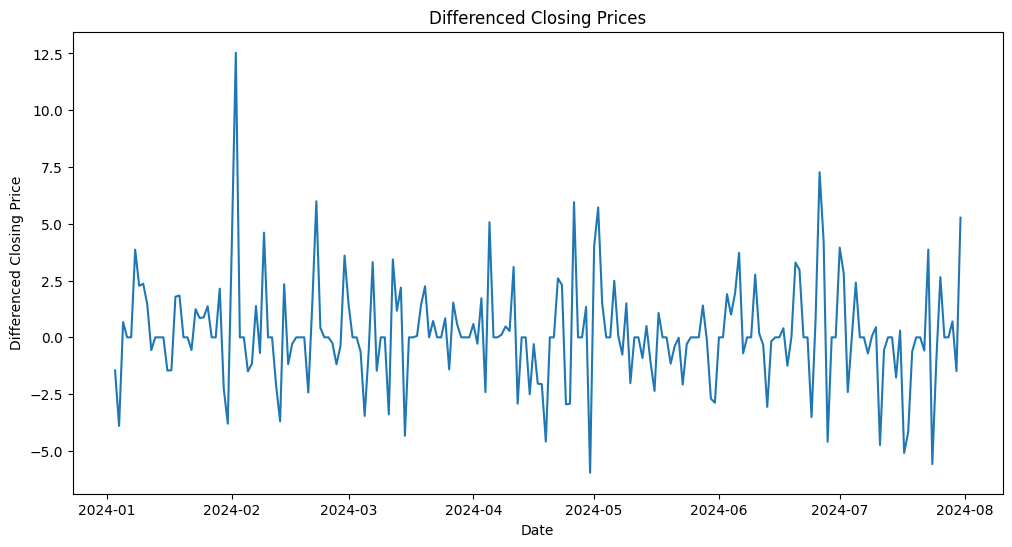

In [ ]:
import matplotlib.pyplot as plt

# Differencing the data to achieve stationarity
differenced_closing_AMZN = AMZN_data['Close'].diff().dropna()


# Plot differenced closing prices
plt.figure(figsize=(12, 6))
plt.plot(differenced_closing_AMZN)
plt.title('Differenced Closing Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Closing Price')
plt.show()



Our data is now stationary with our p-value below the threshold justified by this graph.

Let's find our p and q.

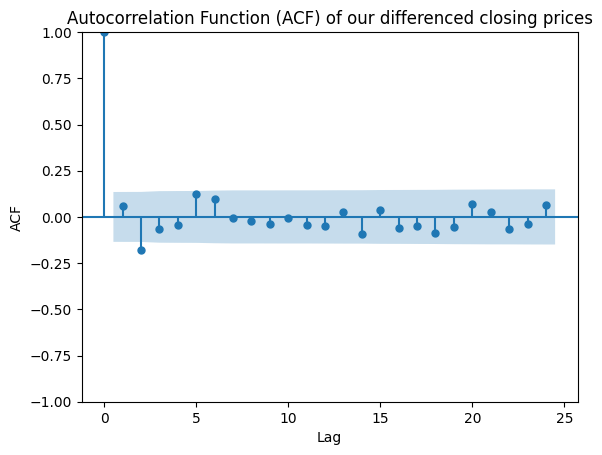

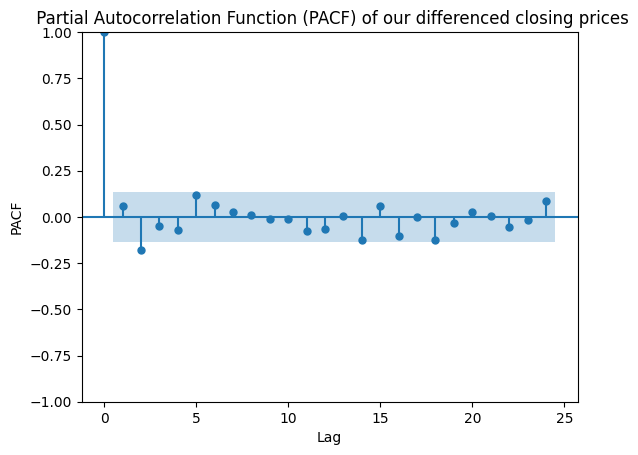

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(differenced_closing_AMZN)
plt.title('Autocorrelation Function (ACF) of our differenced closing prices')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plot_pacf(differenced_closing_AMZN)
plt.title(' Partial Autocorrelation Function (PACF) of our differenced closing prices')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

Let's build our ARIMA Model for our Closing Prices where our attempt order is as follows:
(1,1,1)

2024-06-19    182.854691
2024-06-20    182.821576
2024-06-21    182.846113
2024-06-22    182.827932
2024-06-23    182.841403
2024-06-24    182.831422
2024-06-25    182.838817
2024-06-26    182.833338
2024-06-27    182.837398
2024-06-28    182.834389
2024-06-29    182.836618
2024-06-30    182.834967
2024-07-01    182.836191
2024-07-02    182.835284
2024-07-03    182.835956
2024-07-04    182.835458
2024-07-05    182.835827
2024-07-06    182.835553
2024-07-07    182.835756
2024-07-08    182.835606
2024-07-09    182.835717
2024-07-10    182.835635
2024-07-11    182.835696
2024-07-12    182.835651
2024-07-13    182.835684
2024-07-14    182.835659
2024-07-15    182.835678
2024-07-16    182.835664
2024-07-17    182.835674
2024-07-18    182.835667
2024-07-19    182.835672
2024-07-20    182.835668
2024-07-21    182.835671
2024-07-22    182.835669
2024-07-23    182.835670
2024-07-24    182.835669
2024-07-25    182.835670
2024-07-26    182.835669
2024-07-27    182.835670
2024-07-28    182.835670


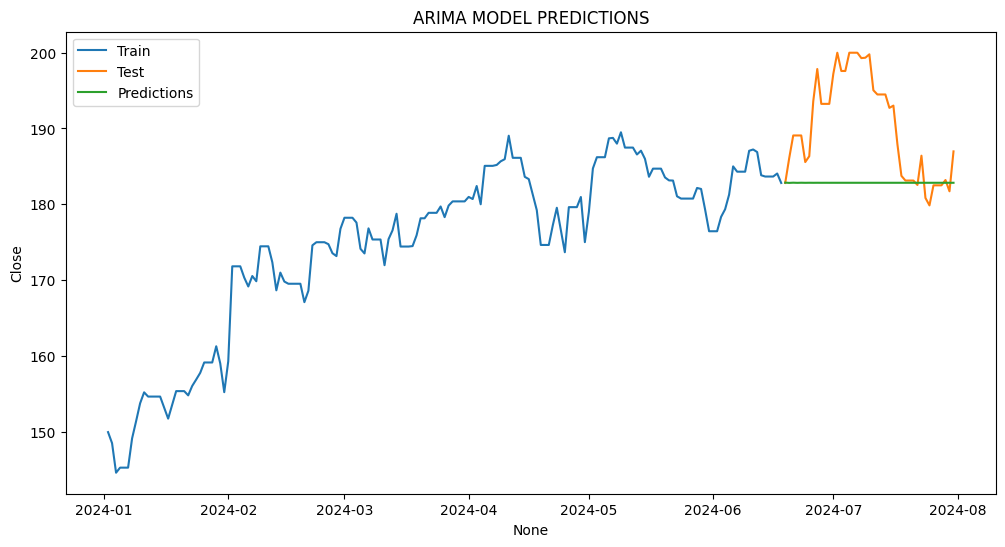

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Splitting the data into train and test sets
train_size = int(len(AMZN_data) * 0.8)
train, test = AMZN_data[:train_size], AMZN_data[train_size:]

# Defining the ARIMA model
order = (1, 1, 1)
model = ARIMA(train['Close'], order=order)
model_fit = model.fit()

# Making predictions
predictions_AMZN = model_fit.forecast(steps=len(test))

# Checking the predictions
print(predictions_AMZN)

# Calculating the RMSE
rmse = sqrt(mean_squared_error(test['Close'], predictions_AMZN))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Converting predictions to a pandas Series to use the test index
predictions_series = pd.Series(predictions_AMZN, index=test.index)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting train data
sns.lineplot(x=train.index, y=train['Close'], label='Train')

# Plotting test data
sns.lineplot(x=test.index, y=test['Close'], label='Test')

# Plotting predictions
sns.lineplot(x=predictions_series.index, y=predictions_series, label='Predictions')

plt.title('ARIMA MODEL PREDICTIONS')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(test['Close'], predictions_AMZN)
mse = mean_squared_error(test['Close'], predictions_AMZN)
rmse = sqrt(mse)
r2 = r2_score(test['Close'], predictions_AMZN)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 7.846373004321509
Mean Squared Error (MSE): 99.88086431039022
Root Mean Squared Error (RMSE): 9.994041440297824
R-squared (R²): -1.2891593366782477


##Model Evaluation of first Model(Amazon)

Interpretation:

Fist, we must note that this dataset performs better than the SONY dataset in terms of accuracy and consistency. It is hence less volatile.

MAE: Our mean absolute error of 7.84 tells us that the absolute difference between our predicted and actual values in our dataset is around 8. On average, our predicted closing prices are off by 8 dollars.

MSE: Our mean squared error of 99.88 tells us that on average, the squared difference between our predicted closing prices and actual prices are 100 dollars which is relatively large as squaring amplifies the effect of larger errors.

RMSE: The RMSE of this model is respectively the square root of the MSE. It is 9.99. The same interpretation of the MSE value can be translated to the RMSE.

R2: Our R2 of -1.28 tells that the model is running poorly. We are aiming to have an R2 between 0 and 1.

#Model Improvement(Amazon)

Let's attempt to improve our model using AIC (Akaike Information Criterion)

In [ ]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

In [ ]:
train_size = int(len(AMZN_data) * 0.8)
train, test = AMZN_data[:train_size], AMZN_data[train_size:]

In [ ]:
p = range(0, 10)
d = range(0,1)
q = range(0, 10)

In [ ]:
# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

In [ ]:
# Initialize variables to store the best parameters and their corresponding AIC
best_aic = float("inf")
best_pdq = None

In [ ]:
# Iterate over all combinations of p, d, q
for param in pdq:
    try:
        # Fit the ARIMA model
        model = ARIMA(train['Close'], order=param)
        model_fit = model.fit()

        # Print current model parameters and AIC
        print(f'ARIMA{param} - AIC:{model_fit.aic}')

        # Check if the current AIC is the best we have seen so far
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
    except Exception as e:
        continue

print(f'Best ARIMA{best_pdq} - AIC:{best_aic}')

ARIMA(0, 0, 0) - AIC:1300.5075762943825
ARIMA(0, 0, 1) - AIC:1104.789725869249


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 2) - AIC:998.3225121910311
ARIMA(0, 0, 3) - AIC:918.8801888111016
ARIMA(0, 0, 4) - AIC:881.2212936185133
ARIMA(0, 0, 5) - AIC:852.9489418860288
ARIMA(0, 0, 6) - AIC:840.2214877818963


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 7) - AIC:828.1394767095521


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 0, 8) - AIC:818.5755104289626
ARIMA(0, 0, 9) - AIC:806.7830491933717
ARIMA(1, 0, 0) - AIC:749.9665828394278
ARIMA(1, 0, 1) - AIC:750.880234618347
ARIMA(1, 0, 2) - AIC:749.576984966204
ARIMA(1, 0, 3) - AIC:751.5411936082237
ARIMA(1, 0, 4) - AIC:752.392355563293
ARIMA(1, 0, 5) - AIC:753.0319194920164
ARIMA(1, 0, 6) - AIC:754.5367427553608
ARIMA(1, 0, 7) - AIC:755.9760120066651
ARIMA(1, 0, 8) - AIC:757.9727846419214
ARIMA(1, 0, 9) - AIC:759.8098262846602
ARIMA(2, 0, 0) - AIC:751.1624617539055


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1) - AIC:749.8677438150621
ARIMA(2, 0, 2) - AIC:751.4754786054552


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 3) - AIC:752.813468361254


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 4) - AIC:753.6413142049246
ARIMA(2, 0, 5) - AIC:754.3715846748003


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 6) - AIC:756.299060150588
ARIMA(2, 0, 7) - AIC:757.9743747004379
ARIMA(2, 0, 8) - AIC:759.9620141861049


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 9) - AIC:761.5037761159258
ARIMA(3, 0, 0) - AIC:750.0631773621172
ARIMA(3, 0, 1) - AIC:751.7558661644891


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 2) - AIC:752.7924651224812
ARIMA(3, 0, 3) - AIC:754.2682803394348


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 4) - AIC:755.5851058454012


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 5) - AIC:755.5610660980606


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 6) - AIC:757.4490685960457


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 7) - AIC:759.2225746656841


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 8) - AIC:758.3499218427582


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 9) - AIC:763.4091859065019
ARIMA(4, 0, 0) - AIC:751.8410933255411
ARIMA(4, 0, 1) - AIC:752.9271070083515


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 2) - AIC:754.1621886212647


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 3) - AIC:753.0352229926821


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 4) - AIC:754.8835368205167


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 5) - AIC:756.7709396865835


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 6) - AIC:758.671066102276


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 7) - AIC:758.0215740766162


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 8) - AIC:762.346739062019


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 9) - AIC:764.4418586736596
ARIMA(5, 0, 0) - AIC:752.2424012279223
ARIMA(5, 0, 1) - AIC:753.1579161306663


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 2) - AIC:755.1434321398253


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 0, 3) - AIC:754.9729873764938


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 0, 4) - AIC:753.9691601404136


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 5) - AIC:755.8335971482511


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 6) - AIC:759.556736407262


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 7) - AIC:759.4076097928819


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 8) - AIC:762.1230275302594


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 9) - AIC:763.6146411742807
ARIMA(6, 0, 0) - AIC:753.0193551566053


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 1) - AIC:755.1726719380522


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(6, 0, 2) - AIC:755.0525531676117


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(6, 0, 3) - AIC:757.4289526513026


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(6, 0, 4) - AIC:757.0314853823465


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 5) - AIC:759.4647619264763


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 6) - AIC:759.8203600612035


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 7) - AIC:761.2875748469246


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 8) - AIC:761.9685406853262


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 9) - AIC:763.3100710158446
ARIMA(7, 0, 0) - AIC:754.9650764475432
ARIMA(7, 0, 1) - AIC:756.7499607908034


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(7, 0, 2) - AIC:758.5675186264256


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(7, 0, 3) - AIC:759.2467836040682


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(7, 0, 4) - AIC:760.5124422436804


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(7, 0, 5) - AIC:760.1895282496657


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(7, 0, 6) - AIC:759.7964146850072


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(7, 0, 7) - AIC:760.992600052344


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(7, 0, 8) - AIC:765.6366798431078


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(7, 0, 9) - AIC:767.0499726578603
ARIMA(8, 0, 0) - AIC:755.9112767762584


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 1) - AIC:758.401342206837


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 2) - AIC:755.9977549788753


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 3) - AIC:756.9514500902892


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

ARIMA(8, 0, 4) - AIC:759.9336211429304


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(8, 0, 5) - AIC:761.0604170411957


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(8, 0, 6) - AIC:761.5819219381842


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 7) - AIC:765.2108616895861


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 8) - AIC:767.332038906739


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 9) - AIC:765.8858699271851
ARIMA(9, 0, 0) - AIC:757.9052440473054


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 1) - AIC:759.845701234362


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 2) - AIC:757.8979522802351


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(9, 0, 3) - AIC:758.6089689015689


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(9, 0, 4) - AIC:763.8502978483227


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(9, 0, 5) - AIC:761.9673667841237


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(9, 0, 6) - AIC:763.013309875625


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 7) - AIC:765.8332765055885


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 8) - AIC:765.1934863844671
ARIMA(9, 0, 9) - AIC:763.2957895063234
Best ARIMA(1, 0, 2) - AIC:749.576984966204


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
order = (1, 0, 2)  #  Best ARIMA model based on our findings.
model = ARIMA(train['Close'], order=order)
model_fit = model.fit()

# Making predictions
predictions_AMZN2 = model_fit.forecast(steps=len(test))

# Checking the predictions
print(predictions_AMZN2)

# Calculating the RMSE
rmse = sqrt(mean_squared_error(test['Close'], predictions_AMZN2))
print(f'Root Mean Squared Error (RMSE): {rmse}')

2024-06-19    182.541759
2024-06-20    182.606063
2024-06-21    182.489227
2024-06-22    182.373458
2024-06-23    182.258745
2024-06-24    182.145079
2024-06-25    182.032451
2024-06-26    181.920851
2024-06-27    181.810270
2024-06-28    181.700698
2024-06-29    181.592126
2024-06-30    181.484545
2024-07-01    181.377946
2024-07-02    181.272320
2024-07-03    181.167658
2024-07-04    181.063951
2024-07-05    180.961191
2024-07-06    180.859369
2024-07-07    180.758476
2024-07-08    180.658505
2024-07-09    180.559445
2024-07-10    180.461290
2024-07-11    180.364031
2024-07-12    180.267660
2024-07-13    180.172168
2024-07-14    180.077548
2024-07-15    179.983791
2024-07-16    179.890891
2024-07-17    179.798838
2024-07-18    179.707625
2024-07-19    179.617245
2024-07-20    179.527690
2024-07-21    179.438953
2024-07-22    179.351025
2024-07-23    179.263900
2024-07-24    179.177570
2024-07-25    179.092028
2024-07-26    179.007267
2024-07-27    178.923280
2024-07-28    178.840059


We can see that our best ARIMA's order is as follows (1,0,2).

The second best order is (2,0,1). The reason why we are considering the second best order (second lowest AIC) is because the best order results to a higher RMSE (11.58 > 9.98).



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2024-06-19    182.691514
2024-06-20    182.489476
2024-06-21    182.352822
2024-06-22    182.172176
2024-06-23    182.027763
2024-06-24    181.860642
2024-06-25    181.714022
2024-06-26    181.556135
2024-06-27    181.410243
2024-06-28    181.259221
2024-06-29    181.115587
2024-06-30    180.970101
2024-07-01    180.829497
2024-07-02    180.688781
2024-07-03    180.551571
2024-07-04    180.415163
2024-07-05    180.281494
2024-07-06    180.149095
2024-07-07    180.018999
2024-07-08    179.890403
2024-07-09    179.763851
2024-07-10    179.638900
2024-07-11    179.515831
2024-07-12    179.394395
2024-07-13    179.274732
2024-07-14    179.156698
2024-07-15    179.040358
2024-07-16    178.925623
2024-07-17    178.812519
2024-07-18    178.700987
2024-07-19    178.591032
2024-07-20    178.482611
2024-07-21    178.375718
2024-07-22    178.270321
2024-07-23    178.166407
2024-07-24    178.063948
2024-07-25    177.962930
2024-07-26    177.863327
2024-07-27    177.765124
2024-07-28    177.668298


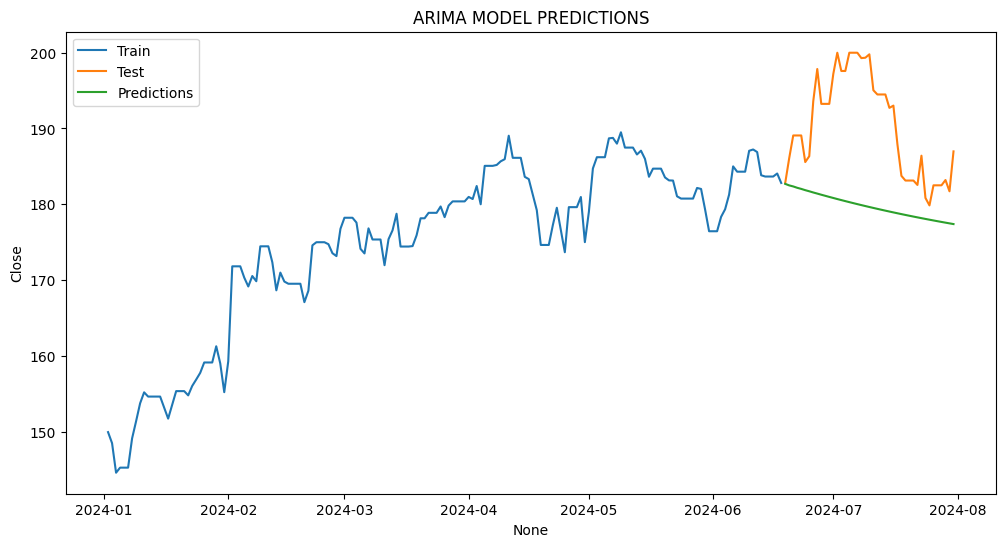

In [ ]:
order = (2, 0, 1)  # Second Best ARIMA model based of our findings.
model = ARIMA(train['Close'], order=order)
model_fit = model.fit()

# Making predictions
predictions_AMZN3 = model_fit.forecast(steps=len(test))

# Checking the predictions
print(predictions_AMZN3)

# Calculating the RMSE
rmse = sqrt(mean_squared_error(test['Close'], predictions_AMZN3))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Converting predictions to a pandas Series to use the test index
predictions_series = pd.Series(predictions_AMZN3, index=test.index)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting train data
sns.lineplot(x=train.index, y=train['Close'], label='Train')

# Plotting test data
sns.lineplot(x=test.index, y=test['Close'], label='Test')

# Plotting predictions
sns.lineplot(x=predictions_series.index, y=predictions_series, label='Predictions')

plt.title('ARIMA MODEL PREDICTIONS')
plt.show()

Shifting to the second best order based on the second lowest AIC increases the RMSE.

We can limit this improvement and deduce that the best model for now is the first model we built based on the order we picked from our ACF and PACF plots.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(test['Close'], predictions_AMZN3)
mse = mean_squared_error(test['Close'], predictions_AMZN3)
rmse = sqrt(mse)
r2 = r2_score(test['Close'], predictions_AMZN3)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 10.560797348139113
Mean Squared Error (MSE): 149.38662837682833
Root Mean Squared Error (RMSE): 12.22238227093345
R-squared (R²): -2.4237768914473286


##Second Model Evaluation(Amazon)

Interpretation:


MAE: Our mean absolute error of 10.6 tells us that the absolute difference between our predicted and actual values in our dataset is around 11. On average, our predicted closing prices are off by 11 dollars.

MSE: Our mean squared error of 149.39 tells us that on average, the squared difference between our predicted closing prices and actual prices are 149 dollars which is relatively large as squaring amplifies the effect of larger errors.

RMSE: The RMSE of this model is respectively the square root of the MSE. It is 12.22. The same interpretation of the MSE value can be translated to the RMSE.

R2: Our R2 of -2.42 tells us that the model is running poorly. We are aiming to have an R2 between 0 and 1.

##Model Improvement to build third model (Amazon)

Let's try to tweak and set up an alternative order to see if our model is going to improve.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2024-06-19    183.043681
2024-06-20    183.284949
2024-06-21    183.449144
2024-06-22    183.667681
2024-06-23    183.851369
2024-06-24    184.057168
2024-06-25    184.248955
2024-06-26    184.449620
2024-06-27    184.644660
2024-06-28    184.843264
2024-06-29    185.039611
2024-06-30    185.237387
2024-07-01    185.434258
2024-07-02    185.631702
2024-07-03    185.828783
2024-07-04    186.026094
2024-07-05    186.223259
2024-07-06    186.420517
2024-07-07    186.617716
2024-07-08    186.814952
2024-07-09    187.012165
2024-07-10    187.209393
2024-07-11    187.406611
2024-07-12    187.603835
2024-07-13    187.801056
2024-07-14    187.998278
2024-07-15    188.195500
2024-07-16    188.392722
2024-07-17    188.589943
2024-07-18    188.787165
2024-07-19    188.984387
2024-07-20    189.181609
2024-07-21    189.378831
2024-07-22    189.576053
2024-07-23    189.773275
2024-07-24    189.970497
2024-07-25    190.167718
2024-07-26    190.364940
2024-07-27    190.562162
2024-07-28    190.759384


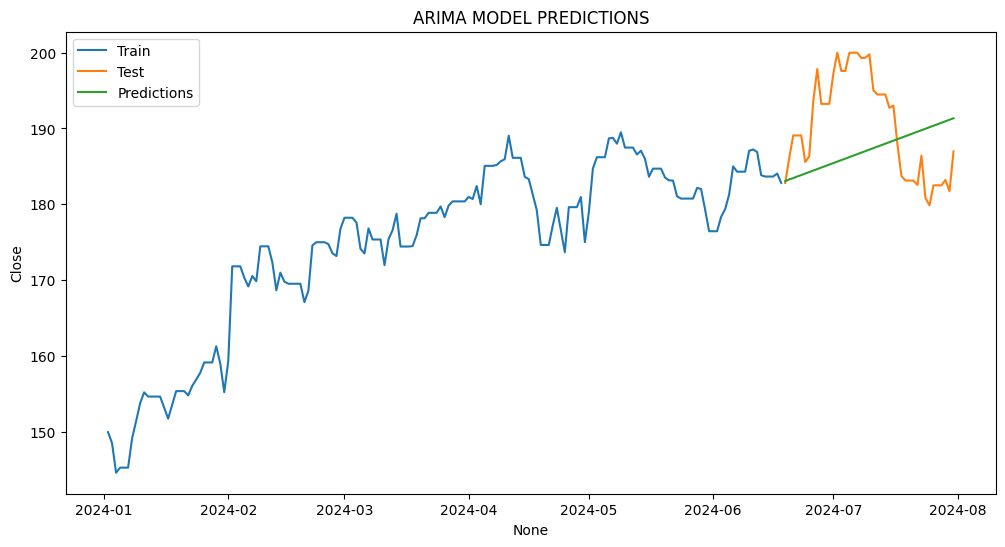

In [ ]:
order = (2, 2, 2)  # Second Best ARIMA model based of our findings.
model = ARIMA(train['Close'], order=order)
model_fit = model.fit()

# Making predictions
predictions_AMZNthird = model_fit.forecast(steps=len(test))

# Checking the predictions
print(predictions_AMZNthird)

# Calculating the RMSE
rmse = sqrt(mean_squared_error(test['Close'], predictions_AMZNthird))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Converting predictions to a pandas Series to use the test index
predictions_series = pd.Series(predictions_AMZNthird, index=test.index)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting train data
sns.lineplot(x=train.index, y=train['Close'], label='Train')

# Plotting test data
sns.lineplot(x=test.index, y=test['Close'], label='Test')

# Plotting predictions
sns.lineplot(x=predictions_series.index, y=predictions_series, label='Predictions')

plt.title('ARIMA MODEL PREDICTIONS')
plt.show()

Although this model is still performing poorly, changing the order alternatively allowed us to have a better RMSE.

##Model Evaluation of third model (Amazon)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(test['Close'], predictions_AMZNthird)
mse = mean_squared_error(test['Close'], predictions_AMZNthird)
rmse = sqrt(mse)
r2 = r2_score(test['Close'], predictions_AMZNthird)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 7.763266989705297
Mean Squared Error (MSE): 74.05162337789345
Root Mean Squared Error (RMSE): 8.605325291811662
R-squared (R²): -0.6971815995193775


Interpretation:


MAE: Our mean absolute error of 7.76 tells us that the absolute difference between our predicted and actual values in our dataset is around 8 dollars. On average, our predicted closing prices are off by 8 dollars.

MSE: Our mean squared error of 74.05 tells us that on average, the squared difference between our predicted closing prices and actual prices are 74 dollars which is relatively large as squaring amplifies the effect of larger errors.

RMSE: The RMSE of this model is respectively the square root of the MSE. It is 8.61. The same interpretation of the MSE value can be translated to the RMSE.

R2: Our R2 of -0.69 tells that the model is running poorly. We are aiming to have an R2 between 0 and 1. However, it is very close.

##Strenghts and Weaknesses of our model performance(Amazon)

From the three models we built we can note these folowing points:

Strenghts: We note an improvement in our MAE, MSE, and RMSE from model 1 to model 3. This is due to the alternative change in the order chosen. This means that our data became able to forecast more accurately predictions as we note a decrease of the r2 score from 11.59 to -0.69.

Weaknesses: This is a major change. However, our ultimate goal is to get an r2 score between 0 and 1 which was not obtained. The forecast is still making some errors.

Moreover, the Akaike Information Criterion supposedly gave us the best order which made our predictions less and less accurate. Relying solely on Akaike Information Criterion could lead to inaccuracies and misleading interpretations.


#LG(Third Dataset Chosen)

#Dataset Collection and Preprocessing(LG)

This dataset was imported from Yahoo Finance which is a reliable source for getting historical data of various firms.

In [ ]:
# Define the ticker symbol and the period
ticker_symbol = 'LPL'
start_date = (datetime.datetime.now() - datetime.timedelta(days=5*365)).strftime('%Y-%m-%d')
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

In [ ]:
import yfinance as yf

# Fetch historical data for LG (Ticker: LPL)
lg_data = yf.download(ticker_symbol, start='2024-01-01', end=end_date)

# Print the first few rows of the data
print(lg_data.head())

[*********************100%%**********************]  1 of 1 completed

            Open  High   Low  Close  Adj Close   Volume
Date                                                   
2024-01-02  4.98  5.05  4.98   5.04       5.04   273900
2024-01-03  5.00  5.46  4.84   4.97       4.97  1817700
2024-01-04  4.91  4.93  4.77   4.80       4.80  1346600
2024-01-05  4.93  5.07  4.92   5.03       5.03  2211600
2024-01-08  5.30  5.44  5.29   5.42       5.42  1760300


##Preprocessing the Data(LG)

In [ ]:
lg_data.shape

(145, 6)

We have 145 rows and 6 columns.

In order to have a more recent dataset, I made the start date to be January 1st, 2024.

We have 145 days of data.

In [ ]:
lg_data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
lg_data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


We have no missing values!

In [ ]:
lg_data.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


Let's make sure we have a consistent time interval between our datapoints.

In [ ]:
import pandas as pd

# Fetch historical data for LG (Ticker: LPL)
lg_data = yf.download('LPL', start='2024-01-01')

# Ensure the index is in datetime format
lg_data.index = pd.to_datetime(lg_data.index)

# Create a complete date range from the start to end of the dataset
full_range = pd.date_range(start=lg_data.index.min(), end=lg_data.index.max())

# Identify missing dates
missing_dates = full_range.difference(lg_data.index)

# Print missing dates
print(f"Missing dates: {missing_dates}")

[*********************100%%**********************]  1 of 1 completed

Missing dates: DatetimeIndex(['2024-01-06', '2024-01-07', '2024-01-13', '2024-01-14',
               '2024-01-15', '2024-01-20', '2024-01-21', '2024-01-27',
               '2024-01-28', '2024-02-03', '2024-02-04', '2024-02-10',
               '2024-02-11', '2024-02-17', '2024-02-18', '2024-02-19',
               '2024-02-24', '2024-02-25', '2024-03-02', '2024-03-03',
               '2024-03-09', '2024-03-10', '2024-03-16', '2024-03-17',
               '2024-03-23', '2024-03-24', '2024-03-29', '2024-03-30',
               '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
               '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
               '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
               '2024-05-12', '2024-05-18', '2024-05-19', '2024-05-25',
               '2024-05-26', '2024-05-27', '2024-06-01', '2024-06-02',
               '2024-06-08', '2024-06-09', '2024-06-15', '2024-06-16',
               '2024-06-19', '2024-06-22', '2024-06-23', '2024

We have a number of days missing.

Let's now handle them.

Let's first have a look at our dataset (daily).


In [ ]:
lg_data.asfreq(freq='D')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,4.98,5.05,4.980,5.04,5.04,273900.0
2024-01-03,5.00,5.46,4.840,4.97,4.97,1817700.0
2024-01-04,4.91,4.93,4.770,4.80,4.80,1346600.0
2024-01-05,4.93,5.07,4.920,5.03,5.03,2211600.0
2024-01-06,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-07-27,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-28,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-29,4.12,4.14,4.030,4.03,4.03,170200.0


To remove the missing values, let's change our dataset to Business Days only as our frequency.

In [ ]:
lg_data.asfreq(freq='B')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,4.98,5.05,4.980,5.04,5.04,273900.0
2024-01-03,5.00,5.46,4.840,4.97,4.97,1817700.0
2024-01-04,4.91,4.93,4.770,4.80,4.80,1346600.0
2024-01-05,4.93,5.07,4.920,5.03,5.03,2211600.0
2024-01-08,5.30,5.44,5.290,5.42,5.42,1760300.0
...,...,...,...,...,...,...
2024-07-25,4.43,4.43,4.210,4.36,4.36,346400.0
2024-07-26,4.28,4.29,4.120,4.12,4.12,167400.0
2024-07-29,4.12,4.14,4.030,4.03,4.03,170200.0


Great! The missing values most likely were corresponding to weekends and holidays.

Let's now handle our missing dates.


In [ ]:
# Reindex the DataFrame to include all dates in the full range
lg_data = lg_data.reindex(full_range)

# Fill missing values (forward fill)
lg_data.fillna(method='ffill', inplace=True)

# Print the first few rows of the data
print(lg_data.head())

            Open  High   Low  Close  Adj Close     Volume
2024-01-02  4.98  5.05  4.98   5.04       5.04   273900.0
2024-01-03  5.00  5.46  4.84   4.97       4.97  1817700.0
2024-01-04  4.91  4.93  4.77   4.80       4.80  1346600.0
2024-01-05  4.93  5.07  4.92   5.03       5.03  2211600.0
2024-01-06  4.93  5.07  4.92   5.03       5.03  2211600.0


<ipython-input-217-49e52ab1bd45>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lg_data.fillna(method='ffill', inplace=True)


Our missing dates have now been handled.


##Visualizations to explore and understand the dataset(LG)

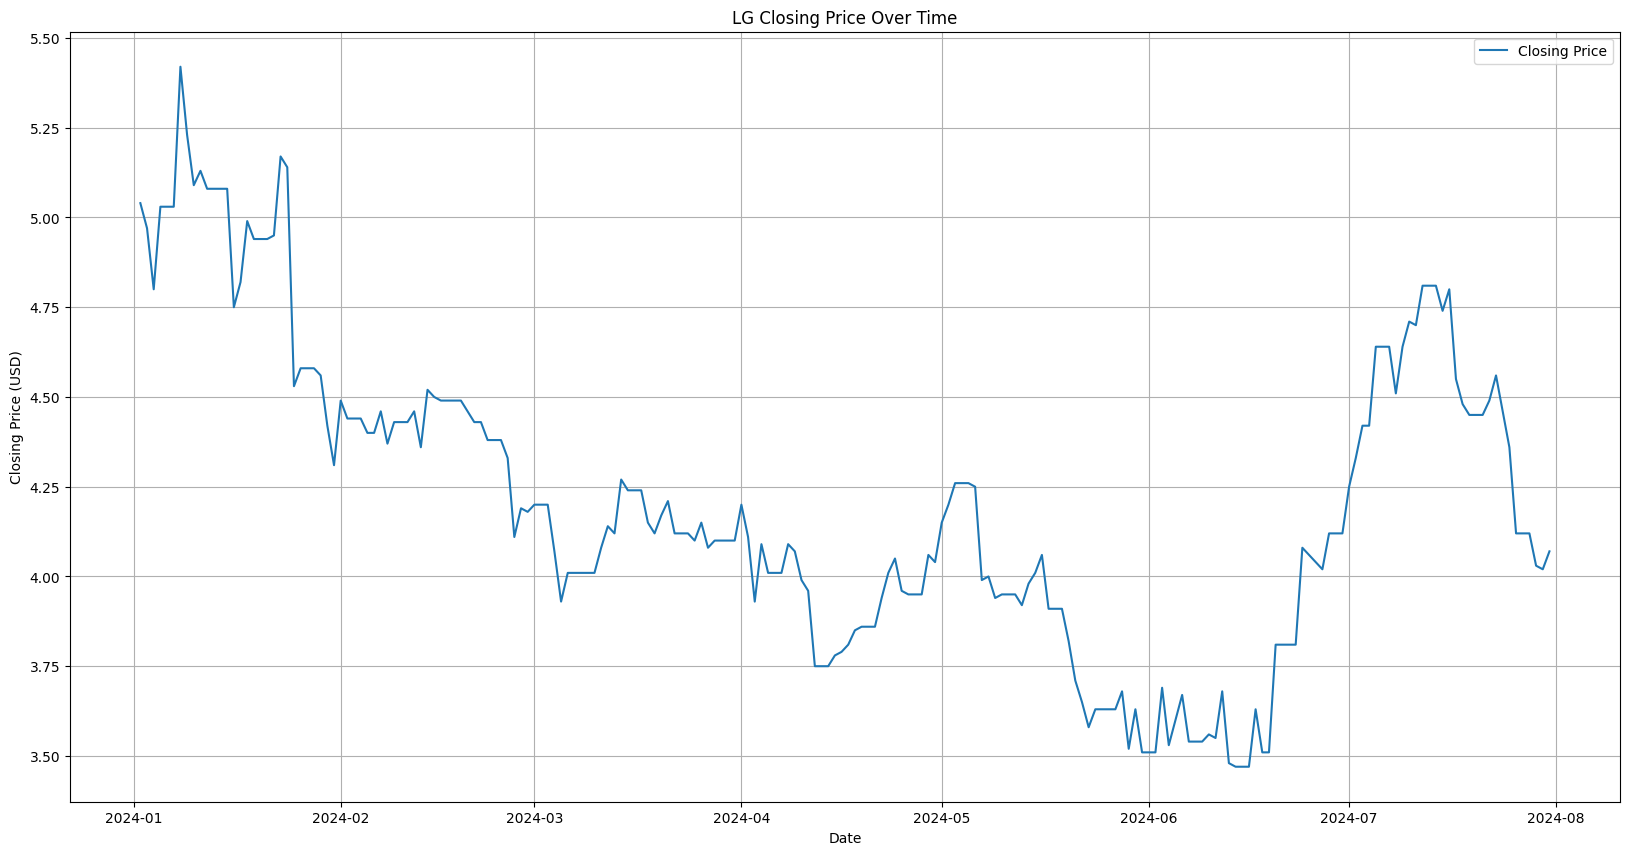

In [ ]:
import matplotlib.pyplot as plt

# Plot the closing price over time
plt.figure(figsize=(20, 10))
plt.plot(lg_data.index, lg_data['Close'], label='Closing Price')
plt.title('LG Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Observing this plot, we can see that our closing prices show upward and downward movements with no clear pattern or trend.

We can infer that our closing prices are very volatile. They are very high at the beginning of the year and start going down gradually. The closing prices see an increase only after June.

An interesting aspect to note about the closing prices is that the high spikes are noticed at the middle of every month except for June.

Let's compare the closing prices to the opening prices.

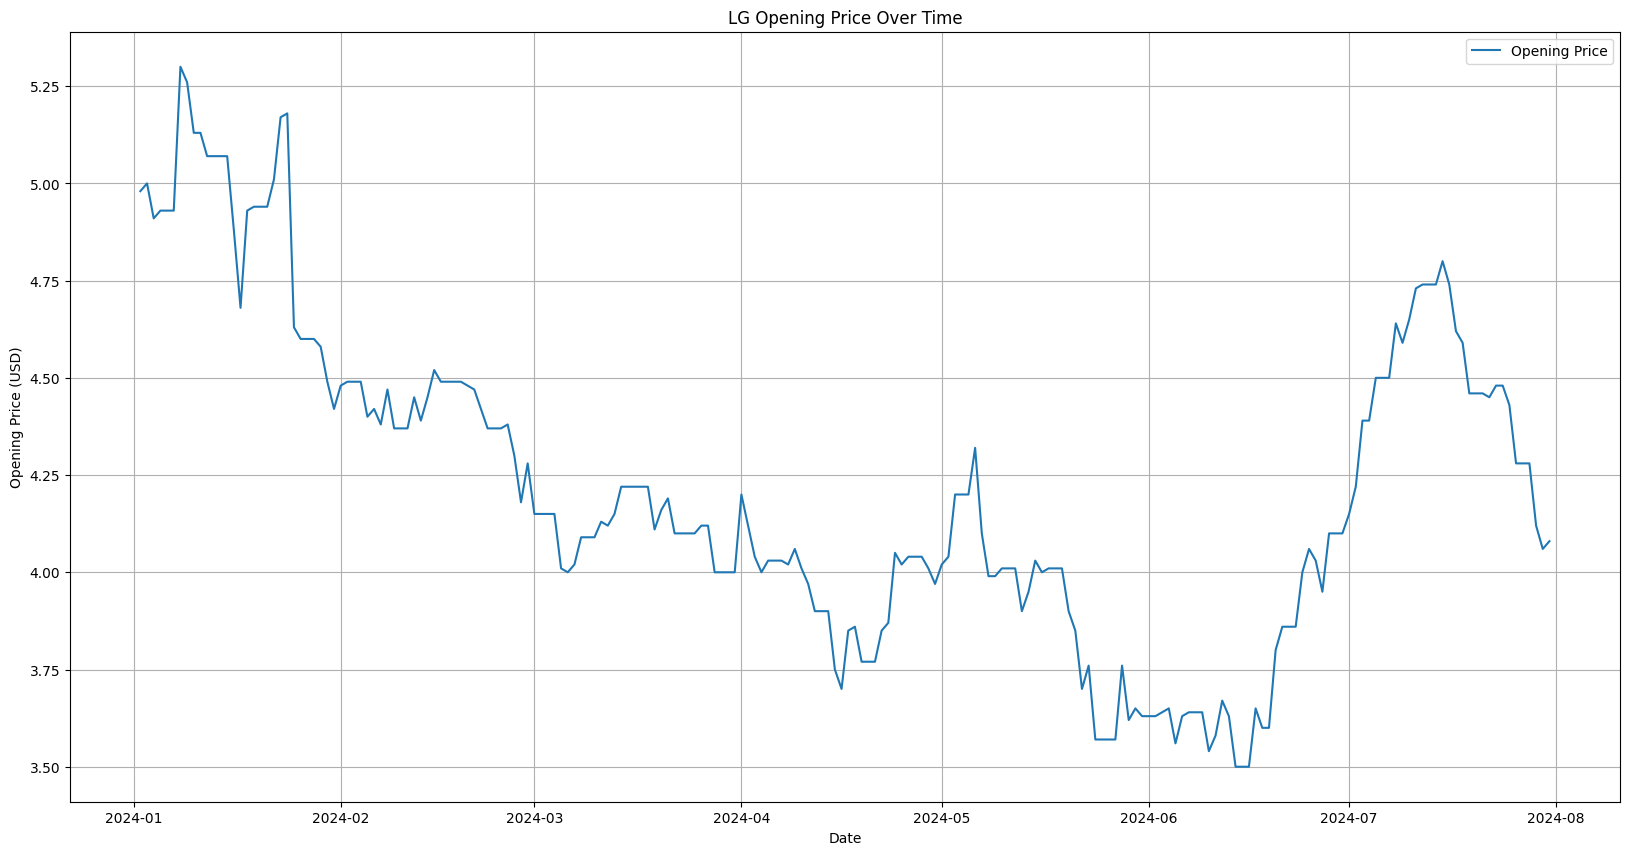

In [ ]:
import matplotlib.pyplot as plt

# Plot the Opening price over time
plt.figure(figsize=(20, 10))
plt.plot(lg_data.index, lg_data['Open'], label='Opening Price')
plt.title('LG Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Interestingly, we can see that our closing prices and opening prices follow very similar patterns.

A timely analysis suggests that at each point in time, opening prices closely match closing prices.

In [ ]:
from re import S
lg_data['Price_Range'] = lg_data['Open'] - lg_data['Close']
lg_data.head()

,Open,High,Low,Close,Adj Close,Volume,Price_Range
2024-01-02,4.98,5.05,4.98,5.04,5.04,273900.0,-0.06
2024-01-03,5.00,5.46,4.84,4.97,4.97,1817700.0,0.03
2024-01-04,4.91,4.93,4.77,4.80,4.80,1346600.0,0.11
2024-01-05,4.93,5.07,4.92,5.03,5.03,2211600.0,-0.10
2024-01-06,4.93,5.07,4.92,5.03,5.03,2211600.0,-0.10


In [ ]:
lg_data['Price_Range'].mean()

0.008584900847021138

Our average difference between our opening and closing prices is around 0.08. This number is low and tells us that opening prices and closing prices do not differ as much.

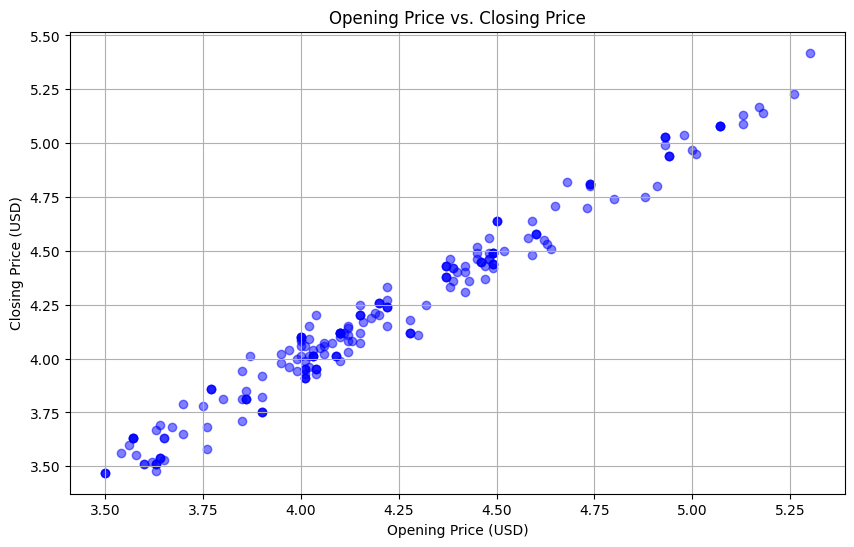

0.9857966869478929

In [ ]:
import matplotlib.pyplot as plt

# Scatter Plot: Opening vs. Closing Prices
plt.figure(figsize=(10, 6))
plt.scatter(lg_data['Open'], lg_data['Close'], alpha=0.5, c='blue')
plt.title('Opening Price vs. Closing Price')
plt.xlabel('Opening Price (USD)')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()
lg_data['Open'].corr(lg_data['Close'])

Effectively, we note a strong positive correlation of 0.99 between our opening prices and closing prices. Consequently, the higher the opening price, the higher the closing price. This also explains the similar trends in both plots portrayed earlier.

#Model Building- ARIMA Model(LG)

Let's first split our data!

We are going to attempt predicting our closing prices.

In [ ]:
lg_data.shape

(212, 7)

80% train and 20% test.



In [ ]:
#Train-test split
train_size=int(len(lg_data)*0.8)
train=lg_data[:train_size]
test=lg_data[train_size:]

Let's make our data stationary!

In [ ]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
import numpy as np
adf_result = adfuller(lg_data['Close'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')



# If not stationary, apply differencing
d = 0
while adf_result[1] > 0.05:
    d += 1
    differenced_data_lg= np.diff(lg_data['Close'], n=d)
    adf_result = adfuller(differenced_data_lg)


ADF Statistic: -2.8661151244549417
p-value: 0.04943262146145829


Our p-value is successfully below the 0.05 threshold.

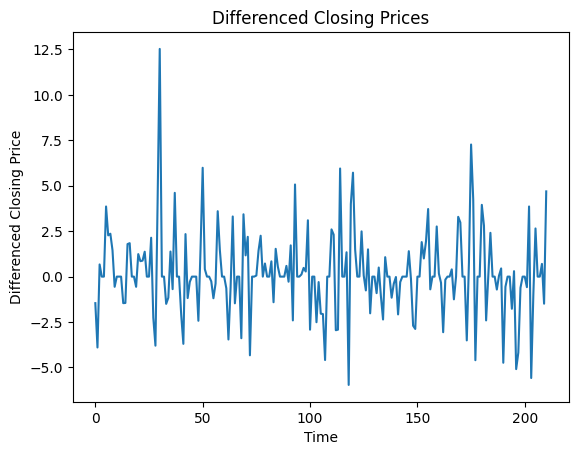

In [ ]:
plt.plot(differenced_data)
plt.title('Differenced Closing Prices')
plt.xlabel('Time')
plt.ylabel('Differenced Closing Price')
plt.show()

Our data is stationary.

Let's find our p and q.

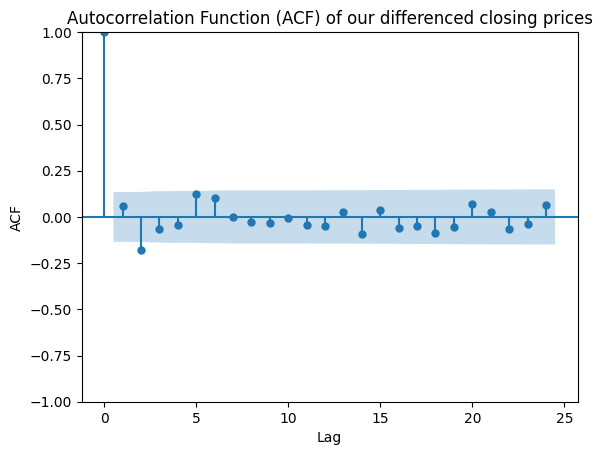

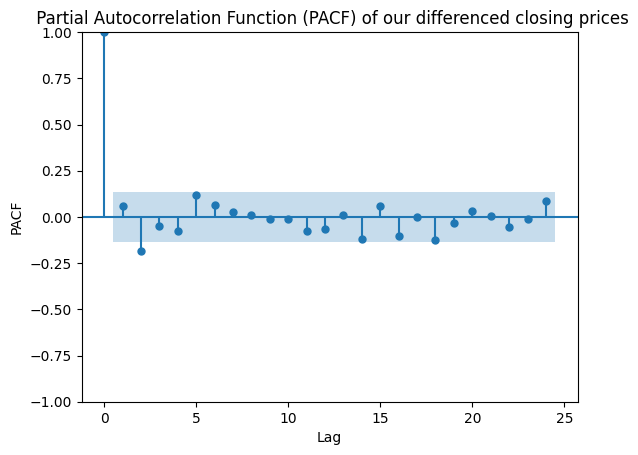

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(differenced_data)
plt.title('Autocorrelation Function (ACF) of our differenced closing prices')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

plot_pacf(differenced_data)
plt.title(' Partial Autocorrelation Function (PACF) of our differenced closing prices')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

Let's build our ARIMA Model for our Closing Prices where our attempt order is as follows: (1,1,1)

2024-06-19    3.518920
2024-06-20    3.521783
2024-06-21    3.522702
2024-06-22    3.522997
2024-06-23    3.523091
2024-06-24    3.523122
2024-06-25    3.523131
2024-06-26    3.523134
2024-06-27    3.523135
2024-06-28    3.523136
2024-06-29    3.523136
2024-06-30    3.523136
2024-07-01    3.523136
2024-07-02    3.523136
2024-07-03    3.523136
2024-07-04    3.523136
2024-07-05    3.523136
2024-07-06    3.523136
2024-07-07    3.523136
2024-07-08    3.523136
2024-07-09    3.523136
2024-07-10    3.523136
2024-07-11    3.523136
2024-07-12    3.523136
2024-07-13    3.523136
2024-07-14    3.523136
2024-07-15    3.523136
2024-07-16    3.523136
2024-07-17    3.523136
2024-07-18    3.523136
2024-07-19    3.523136
2024-07-20    3.523136
2024-07-21    3.523136
2024-07-22    3.523136
2024-07-23    3.523136
2024-07-24    3.523136
2024-07-25    3.523136
2024-07-26    3.523136
2024-07-27    3.523136
2024-07-28    3.523136
2024-07-29    3.523136
2024-07-30    3.523136
2024-07-31    3.523136
Freq: D, Na

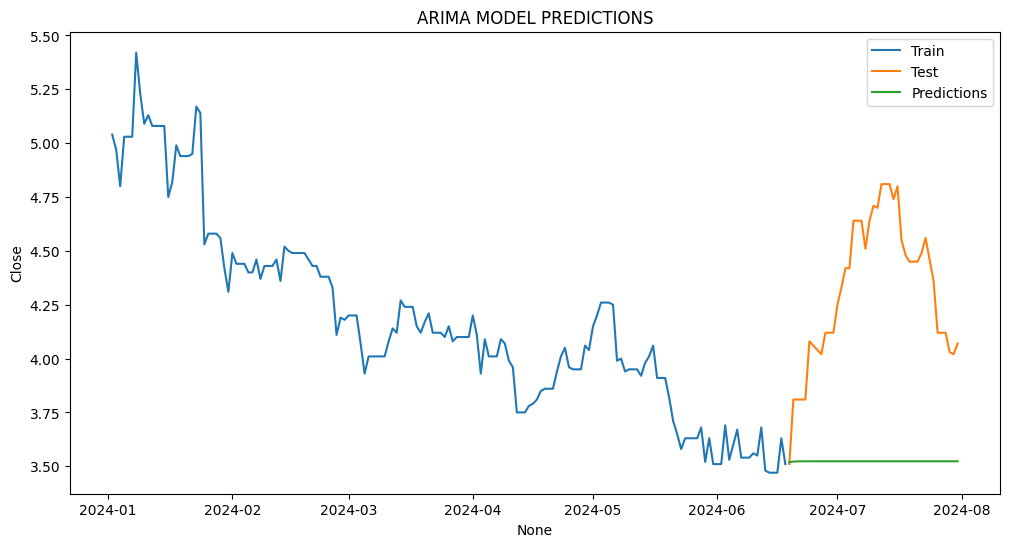

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Splitting the data into train and test sets
train_size = int(len(lg_data) * 0.8)
train, test = lg_data[:train_size], lg_data[train_size:]

# Defining the ARIMA model
order = (1, 1, 1)
model = ARIMA(train['Close'], order=order)
model_fit = model.fit()

# Making predictions
predictions_lg = model_fit.forecast(steps=len(test))

# Checking the predictions
print(predictions_lg)

# Calculating the RMSE
rmse = sqrt(mean_squared_error(test['Close'], predictions_lg))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Converting predictions to a pandas Series to use the test index
predictions_series = pd.Series(predictions_lg, index=test.index)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting train data
sns.lineplot(x=train.index, y=train['Close'], label='Train')

# Plotting test data
sns.lineplot(x=test.index, y=test['Close'], label='Test')

# Plotting predictions
sns.lineplot(x=predictions_series.index, y=predictions_series, label='Predictions')

plt.title('ARIMA MODEL PREDICTIONS')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(test['Close'], predictions_lg)
mse = mean_squared_error(test['Close'], predictions_lg)
rmse = sqrt(mse)
r2 = r2_score(test['Close'], predictions_lg)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 0.8009116656926881
Mean Squared Error (MSE): 0.747504419226275
Root Mean Squared Error (RMSE): 0.8645833789902944
R-squared (R²): -5.991528721408258


##Model Evaluation of first model(LG)

Interpretation:

Fist, we must note that this dataset performs better than the two first datasets in terms of accuracy and consistency. The evaluation metrics show better accuracy in predictions although improvements can be made.

MAE: Our mean absolute error of 0.80 tells us that the absolute difference between our predicted and actual values in our dataset is around 1. On average, our predicted closing prices are off by 1 dollar. This difference is quite minimal.

MSE: Our mean squared error of 0.74 tells us that on average, the squared difference between our predicted closing prices and actual prices are 0.74 dollars which is relatively little.

RMSE: The RMSE of this model is 0.86. Root squared predictions are only off by 0.86, close to a dollar.

R2: However, our R2 of -5.99 still tells that the model is running poorly.We are aiming to have an R2 between 0 and 1.

#Model Improvement(LG)

Let's attempt to improve our model using AIC (Akaike Information Criterion)

In [ ]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

In [ ]:
train_size = int(len(lg_data) * 0.8)
train, test = lg_data[:train_size], lg_data[train_size:]

In [ ]:
p = range(0, 10)
d = range(0,1)
q = range(0, 10)

In [ ]:
# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

In [ ]:
# Initialize variables to store the best parameters and their corresponding AIC
best_aic = float("inf")
best_pdq = None

In [ ]:
# Iterate over all combinations of p, d, q
for param in pdq:
    try:
        # Fit the ARIMA model
        model = ARIMA(train['Close'], order=param)
        model_fit = model.fit()

        # Print current model parameters and AIC
        print(f'ARIMA{param} - AIC:{model_fit.aic}')

        # Check if the current AIC is the best we have seen so far
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = param
    except Exception as e:
        continue

print(f'Best ARIMA{best_pdq} - AIC:{best_aic}')

ARIMA(0, 0, 0) - AIC:210.39366818717528
ARIMA(0, 0, 1) - AIC:30.08772958010328
ARIMA(0, 0, 2) - AIC:-67.66164901346932
ARIMA(0, 0, 3) - AIC:-129.06964067815892
ARIMA(0, 0, 4) - AIC:-171.39269778097878
ARIMA(0, 0, 5) - AIC:-169.15046189964679


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 6) - AIC:-200.24336506265115


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 7) - AIC:-236.16481074892877


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 8) - AIC:-220.11095405844534


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 9) - AIC:-240.0678012297587
ARIMA(1, 0, 0) - AIC:-286.2014532910794
ARIMA(1, 0, 1) - AIC:-290.9774487815382
ARIMA(1, 0, 2) - AIC:-291.2307853397672
ARIMA(1, 0, 3) - AIC:-290.4876328551166


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 4) - AIC:-288.8691180759308


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 5) - AIC:-286.58574104708765


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 6) - AIC:-285.8528064423913


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 7) - AIC:-288.65490227048997


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 8) - AIC:-290.4949051691648


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 9) - AIC:-294.62112229398974
ARIMA(2, 0, 0) - AIC:-289.07371056261474


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1) - AIC:-282.50789338913484


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 2) - AIC:-290.48610851796684


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 3) - AIC:-288.7004199514778
ARIMA(2, 0, 4) - AIC:-286.98507763285596


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 5) - AIC:-284.89206598686945


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 6) - AIC:-284.6767279553844


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 7) - AIC:-282.4209626171565


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 8) - AIC:-292.3596645225246


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 9) - AIC:-292.096400572515
ARIMA(3, 0, 0) - AIC:-292.0086968219782


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 0, 1) - AIC:-290.9113369700737


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 0, 2) - AIC:-290.5618393155026


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 0, 3) - AIC:-292.8843281399747


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 4) - AIC:-288.3575430817971


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 5) - AIC:-294.38961851389746


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 6) - AIC:-293.38053081478114


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 7) - AIC:-288.9827905444557


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 8) - AIC:-291.11363001189653


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 9) - AIC:-289.23381458729637
ARIMA(4, 0, 0) - AIC:-290.4401866623141


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 0, 1) - AIC:-288.8694457665456


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 0, 2) - AIC:-293.58961347675836


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(4, 0, 3) - AIC:-290.5417095611752


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 4) - AIC:-289.7754283298603


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 5) - AIC:-291.69211980855243


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 6) - AIC:-291.24450765527183


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 7) - AIC:-289.6391714002534


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 8) - AIC:-290.5835645293748


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 9) - AIC:-289.0143668517643


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 0) - AIC:-289.8416805730204


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 1) - AIC:-286.95516944871895


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 0, 2) - AIC:-294.3387418141203


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(5, 0, 3) - AIC:-293.6327319426462


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 4) - AIC:-289.1046069671896


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 5) - AIC:-290.88143501781303


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 6) - AIC:-290.28764213116796


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 7) - AIC:-289.3981601638372


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 8) - AIC:-290.18801302089196


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(5, 0, 9) - AIC:-289.32323359797954
ARIMA(6, 0, 0) - AIC:-287.85532534894867


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 1) - AIC:-286.15144219842085


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(6, 0, 2) - AIC:-294.79380787932905


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(6, 0, 3) - AIC:-292.66651690609655


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 4) - AIC:-296.60405336800216


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 5) - AIC:-294.98753446037983


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 6) - AIC:-289.34043663721184


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 7) - AIC:-289.73667180782405


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 8) - AIC:-288.8116507601473


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 0, 9) - AIC:-287.1978363866359
ARIMA(7, 0, 0) - AIC:-289.50585305620876


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(7, 0, 1) - AIC:-287.9038687557608


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(7, 0, 2) - AIC:-293.7424353646685


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(7, 0, 3) - AIC:-291.2582510666848


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(7, 0, 4) - AIC:-292.3051433655449


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(7, 0, 5) - AIC:-291.8883502024337


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(7, 0, 6) - AIC:-291.1414350584897


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(7, 0, 7) - AIC:-285.4115006403508


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(7, 0, 8) - AIC:-289.8408278220165


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(7, 0, 9) - AIC:-284.685031827473
ARIMA(8, 0, 0) - AIC:-289.27800587815386


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 1) - AIC:-286.20321858304396


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(8, 0, 2) - AIC:-292.5188479090475


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(8, 0, 3) - AIC:-290.0469991528055


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 4) - AIC:-292.6750718899051


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 5) - AIC:-290.62981287566805


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 6) - AIC:-289.7349066689826


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 7) - AIC:-287.50744095034173


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 8) - AIC:-291.04791481959165


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 0, 9) - AIC:-286.6945517493034


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 0) - AIC:-295.7114657184281


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 1) - AIC:-295.5177900279594


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 2) - AIC:-294.5320687963541


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(9, 0, 3) - AIC:-292.9757804221848


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 4) - AIC:-291.00096753477214


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 5) - AIC:-289.13355141381874


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 6) - AIC:-288.43118527433035


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(9, 0, 7) - AIC:-287.1643826301131


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(9, 0, 8) - AIC:-290.09977771664387
ARIMA(9, 0, 9) - AIC:-284.0956560049774
Best ARIMA(6, 0, 4) - AIC:-296.60405336800216


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
order = (6, 0, 4)  #  Best ARIMA model based of our findings.
model = ARIMA(train['Close'], order=order)
model_fit = model.fit()

# Making predictions
predictions_lg2 = model_fit.forecast(steps=len(test))

# Checking the predictions
print(predictions_lg2)

# Calculating the RMSE
rmse = sqrt(mean_squared_error(test['Close'], predictions_lg2))
print(f'Root Mean Squared Error (RMSE): {rmse}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2024-06-19    3.464277
2024-06-20    3.484403
2024-06-21    3.532513
2024-06-22    3.515407
2024-06-23    3.504742
2024-06-24    3.503086
2024-06-25    3.494357
2024-06-26    3.526556
2024-06-27    3.539088
2024-06-28    3.497658
2024-06-29    3.501273
2024-06-30    3.534876
2024-07-01    3.526152
2024-07-02    3.521048
2024-07-03    3.526189
2024-07-04    3.513780
2024-07-05    3.528703
2024-07-06    3.547902
2024-07-07    3.524008
2024-07-08    3.519007
2024-07-09    3.542786
2024-07-10    3.538726
2024-07-11    3.534573
2024-07-12    3.543469
2024-07-13    3.533743
2024-07-14    3.537464
2024-07-15    3.556022
2024-07-16    3.544423
2024-07-17    3.536377
2024-07-18    3.553160
2024-07-19    3.552394
2024-07-20    3.547769
2024-07-21    3.557393
2024-07-22    3.552223
2024-07-23    3.549907
2024-07-24    3.564882
2024-07-25    3.561279
2024-07-26    3.552986
2024-07-27    3.564578
2024-07-28    3.566316
2024-07-29    3.561365
2024-07-30    3.569745
2024-07-31    3.568779
Freq: D, Na

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


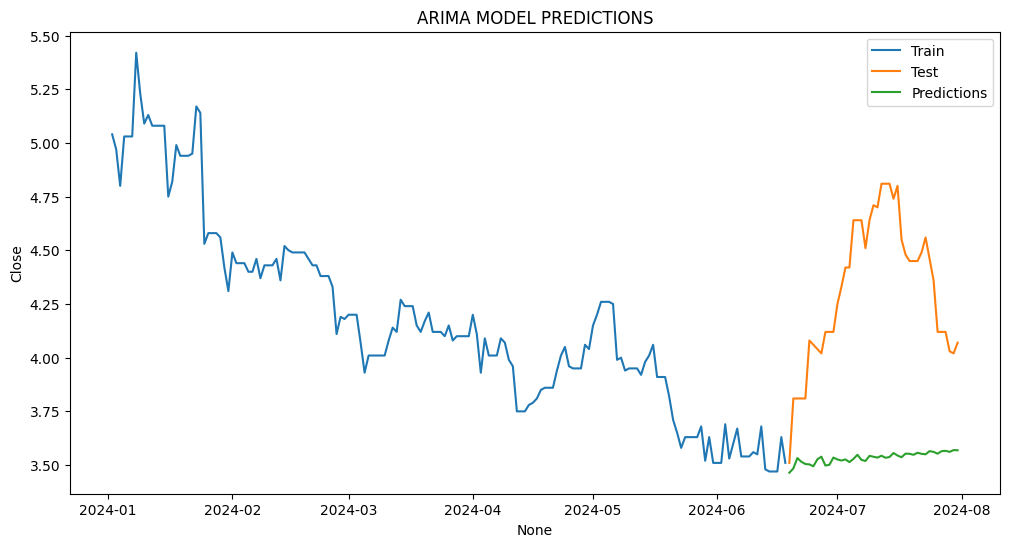

In [ ]:
# Converting predictions to a pandas Series to use the test index
predictions_series = pd.Series(predictions_lg2, index=test.index)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting train data
sns.lineplot(x=train.index, y=train['Close'], label='Train')

# Plotting test data
sns.lineplot(x=test.index, y=test['Close'], label='Test')

# Plotting predictions
sns.lineplot(x=predictions_series.index, y=predictions_series, label='Predictions')

plt.title('ARIMA MODEL PREDICTIONS')
plt.show()

##Second Model Evaluation(LG)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(test['Close'], predictions_lg2)
mse = mean_squared_error(test['Close'], predictions_lg2)
rmse = sqrt(mse)
r2 = r2_score(test['Close'], predictions_lg2)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.7887119253254297
Mean Squared Error (MSE): 0.7231491839949119
Root Mean Squared Error (RMSE): 0.8503817871961463
R-squared (R²): -5.763730300078546


Interpretation:

MAE: Our mean absolute error of 0.78 tells us that the absolute difference between our predicted and actual values in our dataset is around a dollar just like our first model with a very minimal difference. On average, our predicted closing prices are off by only 0.8 dollars.

MSE: Our mean squared error of 0.72 tells us that on average, the squared difference between our predicted closing prices and actual prices is 0.72 dollars which is relatively small. (0.2 more accurate than predictions for the initial model in terms of MSE).

RMSE: The RMSE of this model is 0.85. The model is also more accurate than the initial one in terms of RMSE by 0.1.

R2: Our R2 of -5.76 tells that the model is still running poorly. However, major improvements have been made.

##Strenghts and Weaknesses(LG)

Strenghts:

This dataset (LG) has a more reliable dataset.

This was proven by the two models we built that showed us imperfect, yet closer accurate predictions than Sony's and Amazon's dataset.

The difference for the MAE, the MSE, and the RMSE were slighlty close to 0. This proves that the model was trying to make the best predictions it could and picked up some trends and patterns on the way.


Weaknesses: However, the high r2 score (-5.76) is not very optimal. It tells us that predictions are still inaccurate. Relying solely on the AIC as concluded in the Amazon dataset is not an accurate way to predict values. Perhaps, considering an improvement model such as exponential smoothing which picks up very well trends and patterns could further improve our model?